In [11]:
import pandas as pd

### Cargamos las metricas y coeficientes de los modelos

In [12]:
lineal_coefs_df = pd.read_csv(
    '../../datamarts/coeficientes_por_categoria_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

nonlineal_importances_df = pd.read_csv(
    '../../datamarts/impotancia_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_lineal_df = pd.read_csv(
    '../../datamarts/metricas_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

metrics_nonlineal_df = pd.read_csv(
    '../../datamarts/r2_por_categoria_no_lineal.tsv',
    sep='\t',
    encoding='utf-8'
)

## Comparativa del modelo lineal y no lineal

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
def compare_coefficients_and_importances_with_r2(
    linear_coefs_df,
    nonlinear_importances_df,
    linear_metrics_df,
    nonlinear_metrics_df,
    top_n=10
):
    results = []

    # Ensure index
    if 'Variable' in linear_coefs_df.columns:
        linear_coefs_df = linear_coefs_df.set_index('Variable')

    targets = nonlinear_importances_df['Target'].unique()

    for target in targets:
        if target not in linear_coefs_df.columns:
            continue

        # Coefficients
        coefs = linear_coefs_df[target].dropna()
        top_coefs = coefs.abs().sort_values(ascending=False).head(top_n)
        top_coef_vars = top_coefs.index
        top_coef_values = coefs[top_coef_vars].values  # keep original signs

        # Importances
        imp_target = nonlinear_importances_df[nonlinear_importances_df['Target'] == target]
        top_importances = imp_target.sort_values(by='Importance', ascending=False).head(top_n)
        top_imp_vars = top_importances['Variable']

        # R²
        r2_linear_val = linear_metrics_df.loc[linear_metrics_df['Gasto'] == target, 'R2']
        r2_linear_str = f"{r2_linear_val.values[0]:.3f}" if not r2_linear_val.empty else "N/A"

        r2_nonlinear_val = nonlinear_metrics_df.loc[nonlinear_metrics_df['Target'] == target, 'R2']
        r2_nonlinear_str = f"{r2_nonlinear_val.values[0]:.3f}" if not r2_nonlinear_val.empty else "N/A"

        # Plot
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Colors for coefficients: darkred if positive, darkblue if negative
        coef_colors = ['darkred' if v > 0 else 'darkblue' for v in top_coef_values]

        axs[0].barh(
            top_coef_vars,
            top_coefs.values,
            color=coef_colors
        )
        axs[0].set_title(f'|Coef| - {target}\nR² linear = {r2_linear_str}')
        axs[0].invert_yaxis()
        axs[0].set_xlabel('Absolute Coefficient Value')

        # Colors for importances: all black
        imp_colors = ['black'] * len(top_imp_vars)

        axs[1].barh(
            top_imp_vars,
            top_importances['Importance'].values,
            color=imp_colors
        )
        axs[1].set_title(f'Importance - {target}\nR² nonlinear = {r2_nonlinear_str}')
        axs[1].invert_yaxis()
        axs[1].set_xlabel('Model Importance')

        plt.suptitle(f'Comparison: Coefficients vs Importances - {target}', fontsize=14)
        plt.tight_layout()
        results.append(fig)

    return results


C:\Users\rauul\AppData\Local\Temp\ipykernel_17964\1802690973.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(15, 6))


[<Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 <Figure size 1500x600 with 2 Axes>,
 

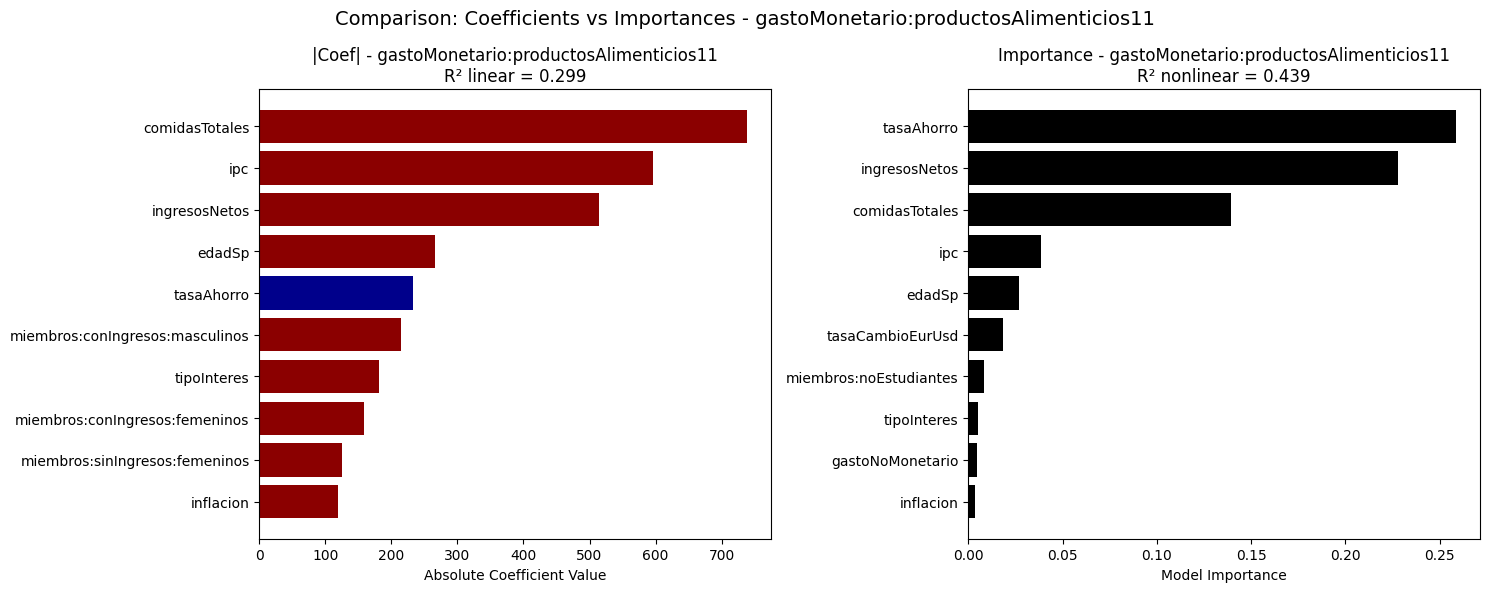

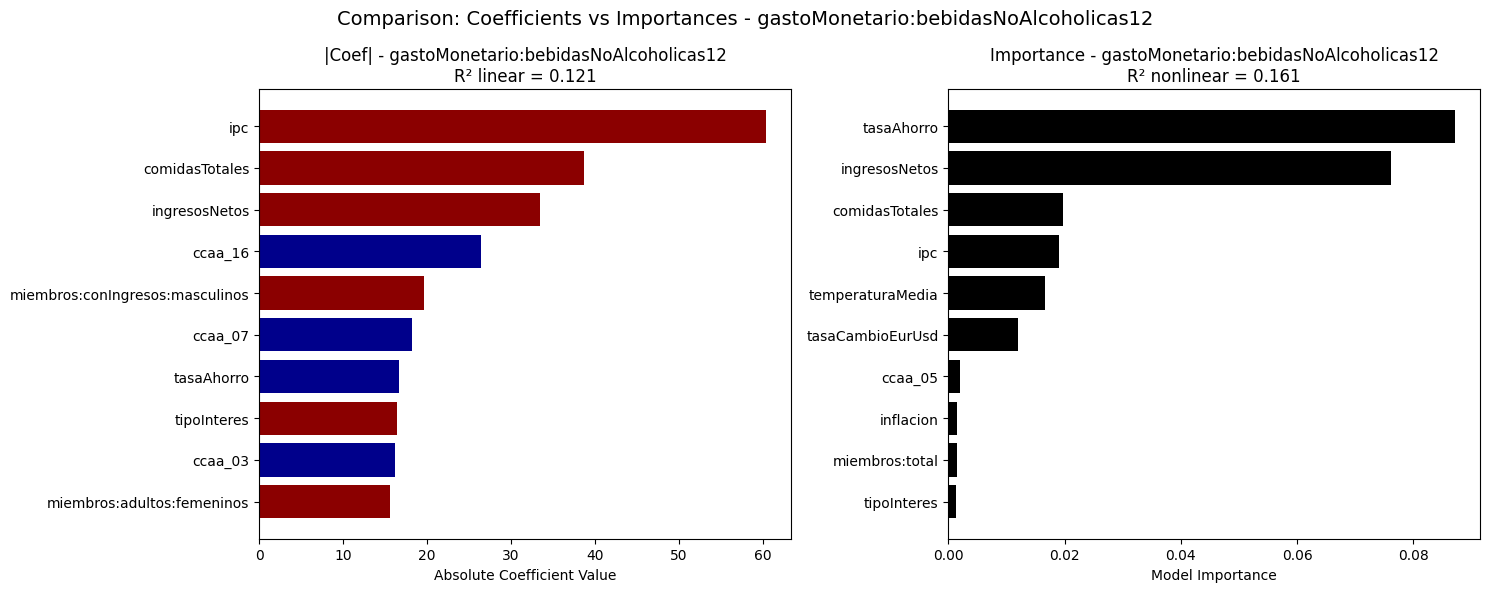

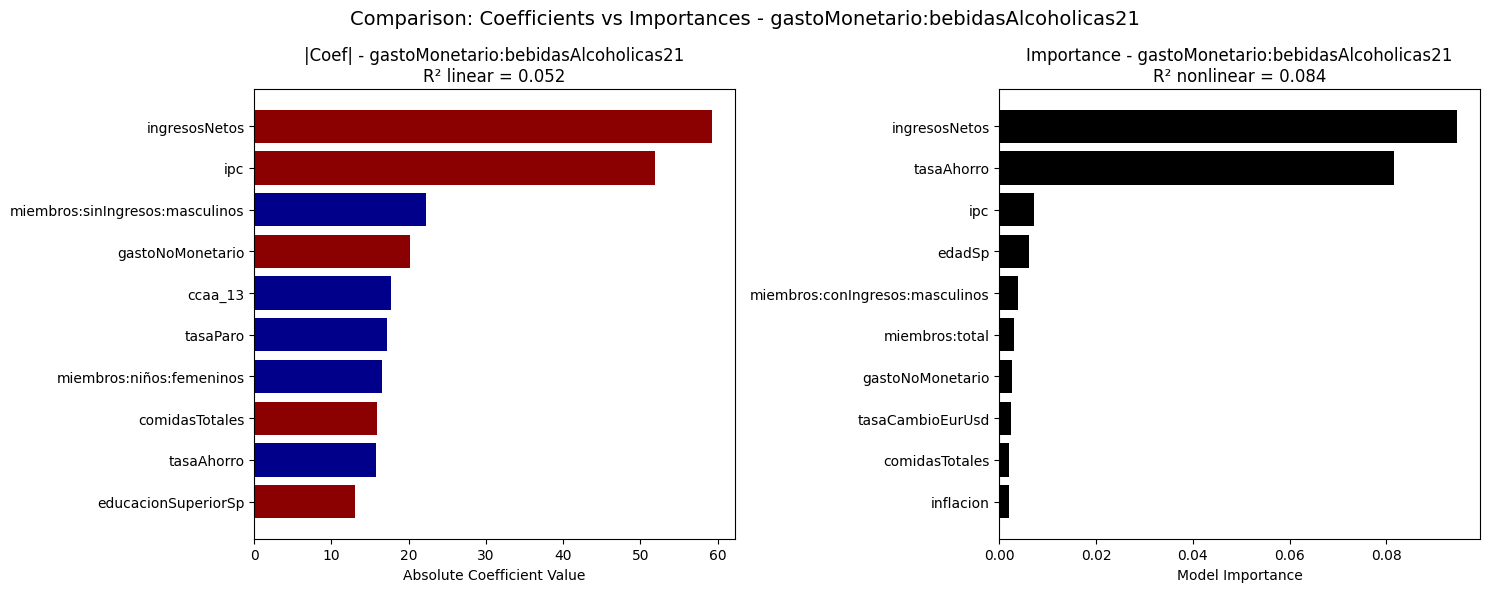

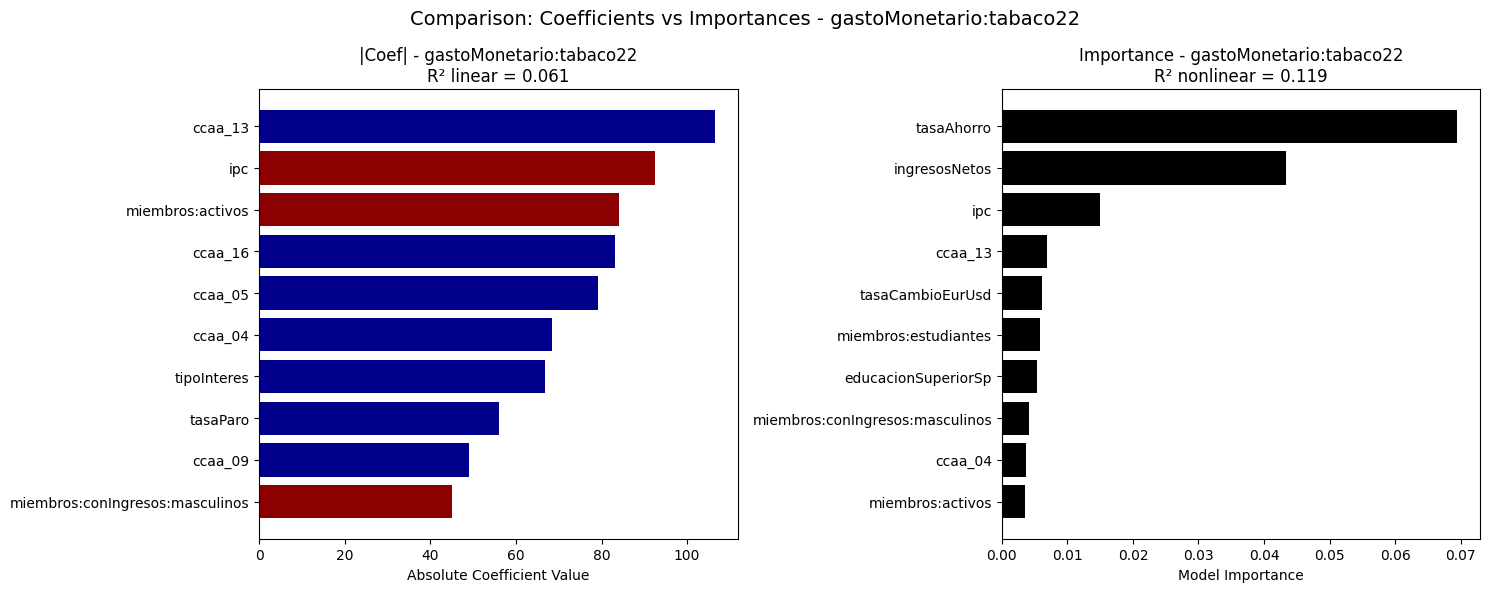

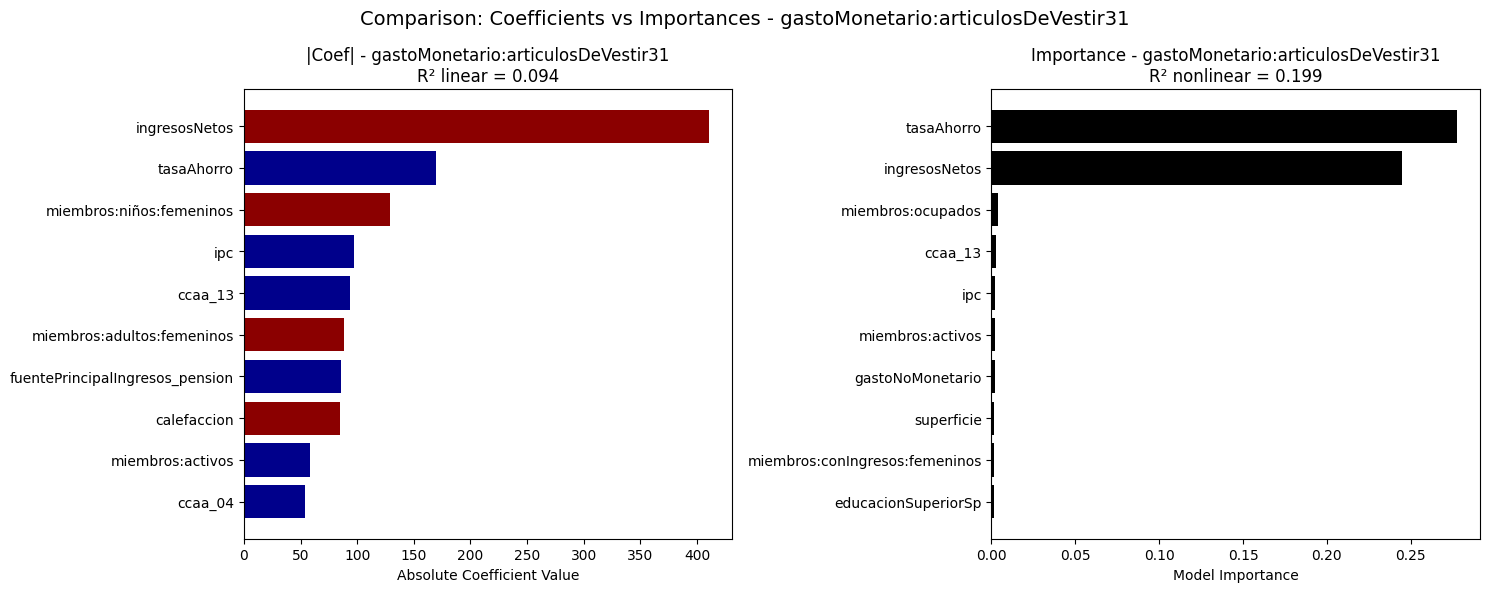

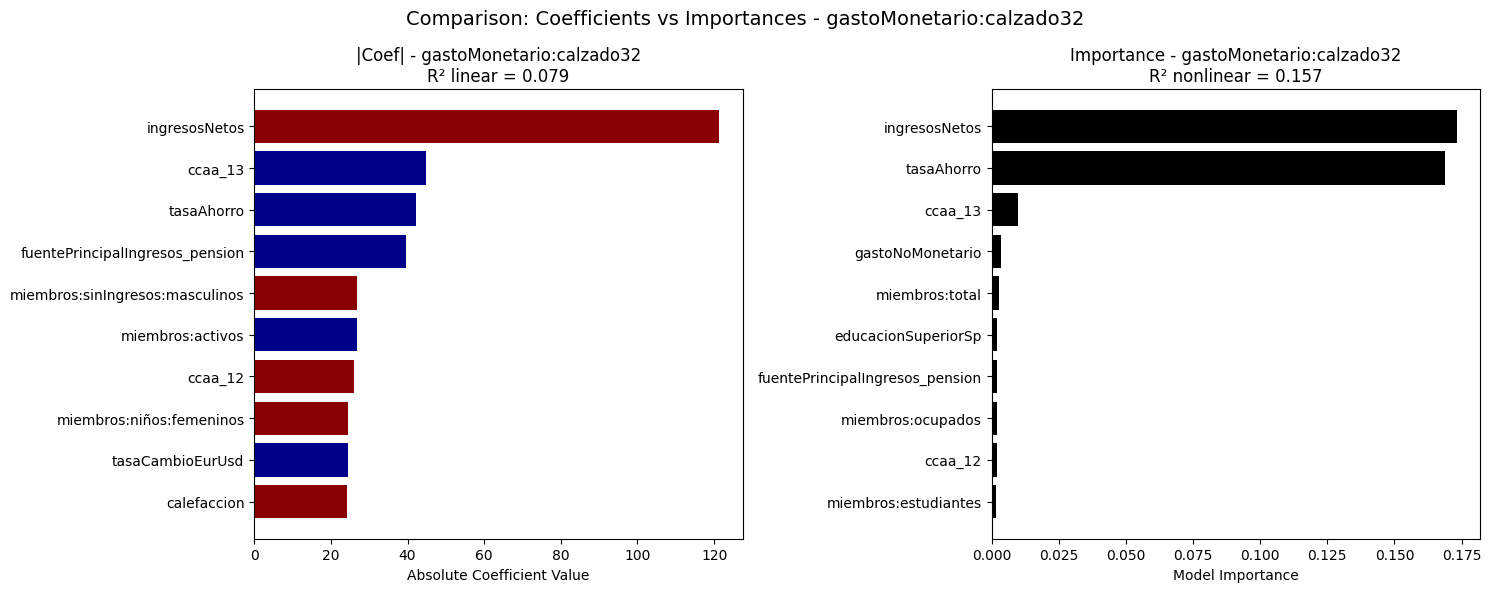

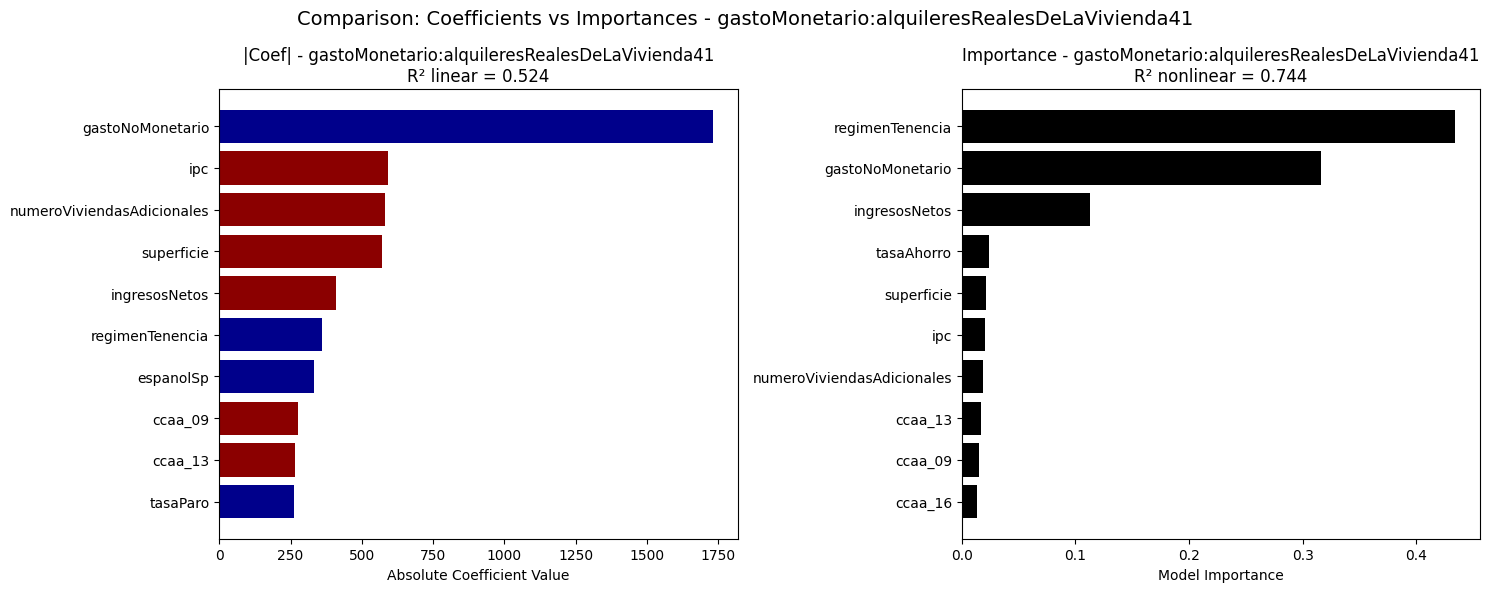

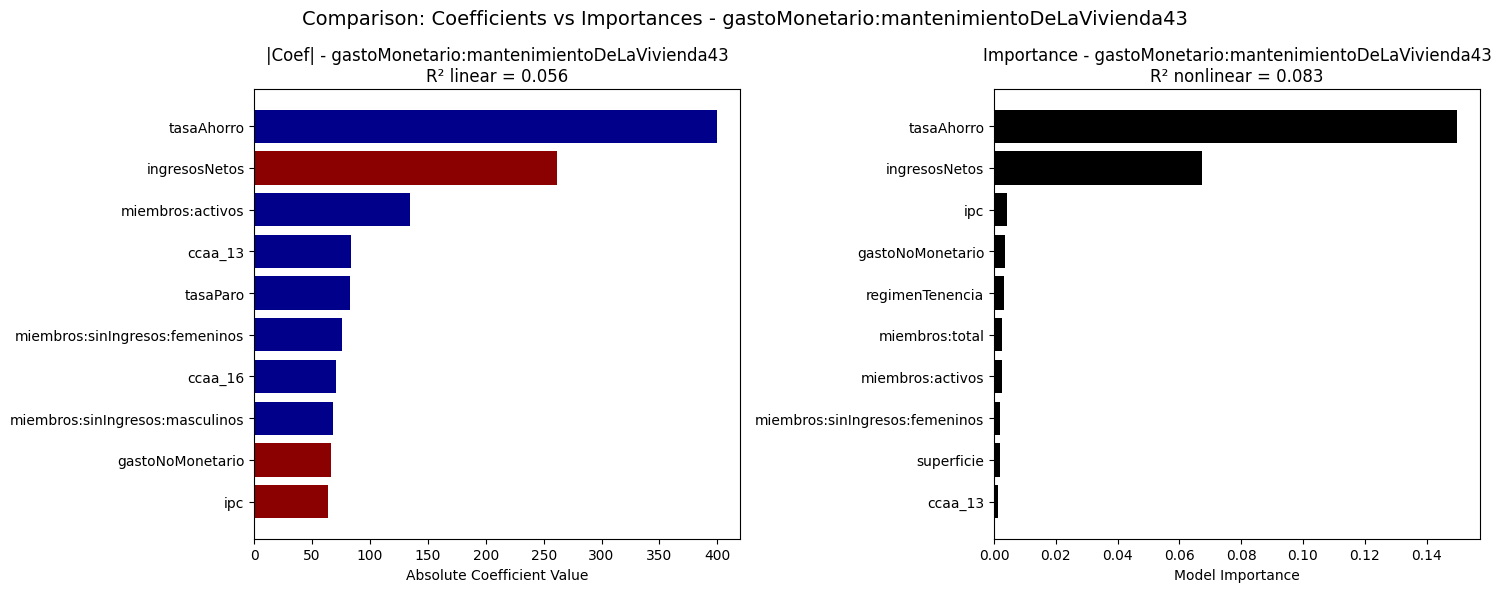

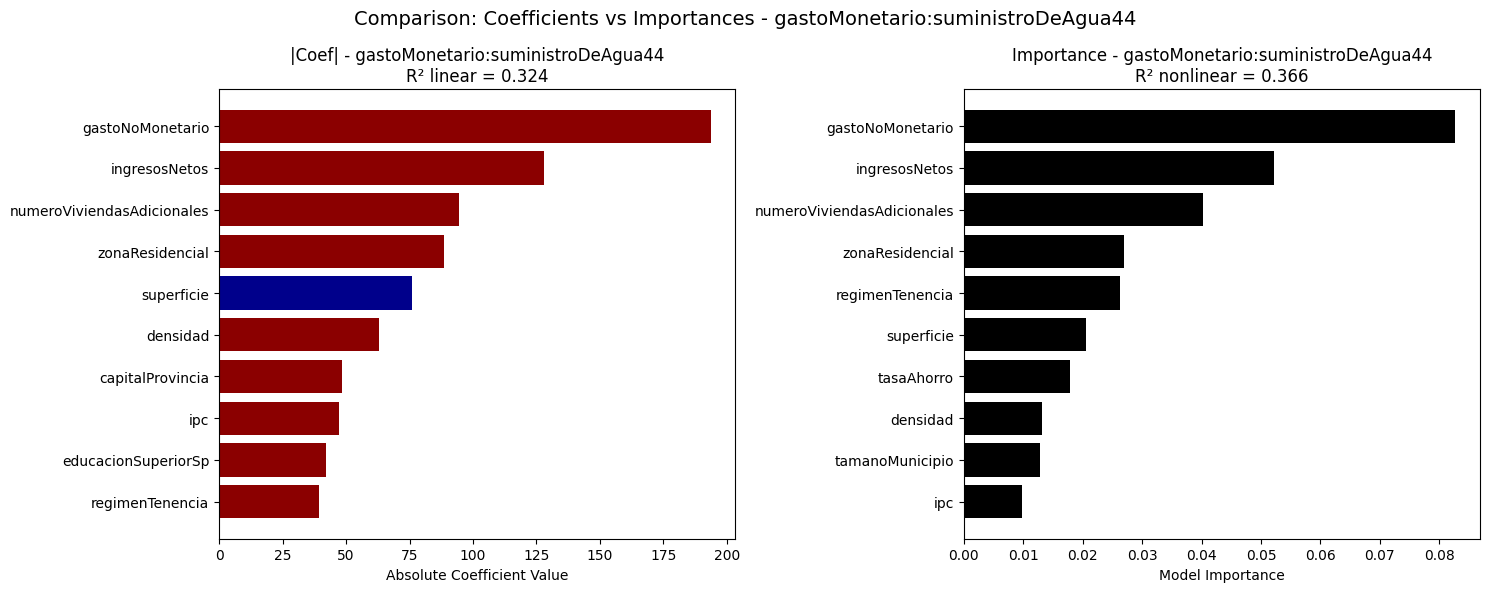

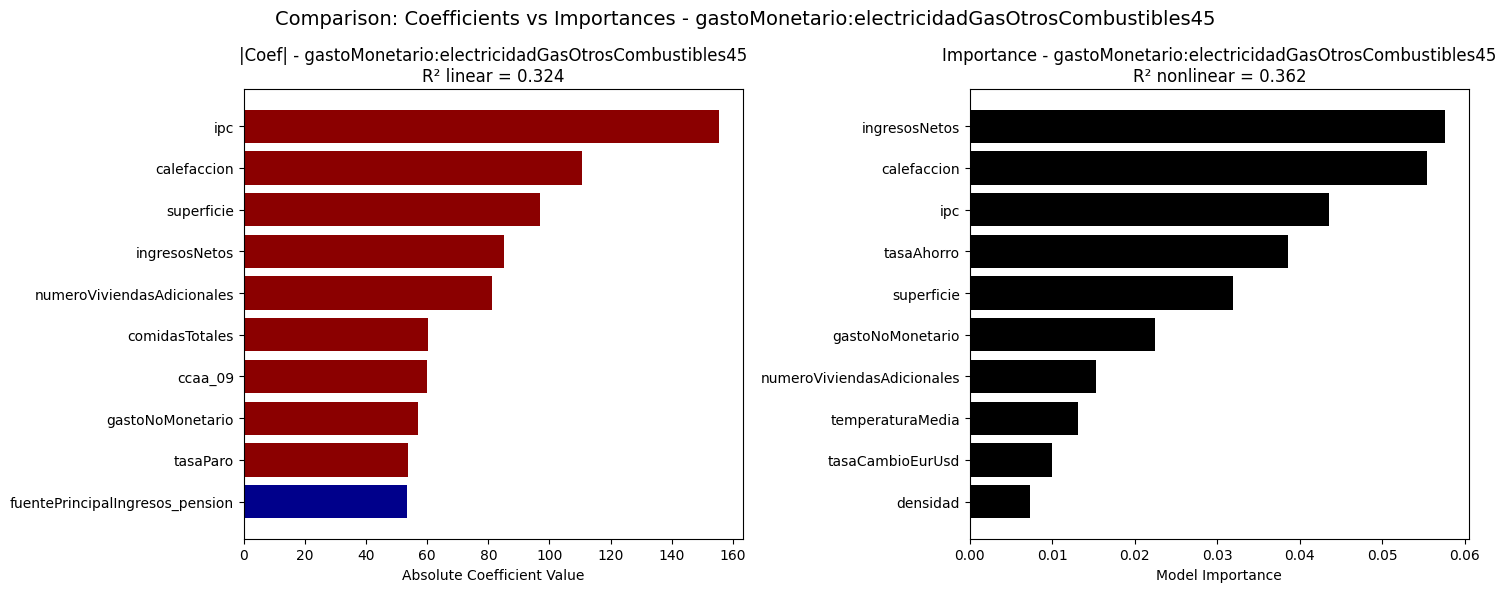

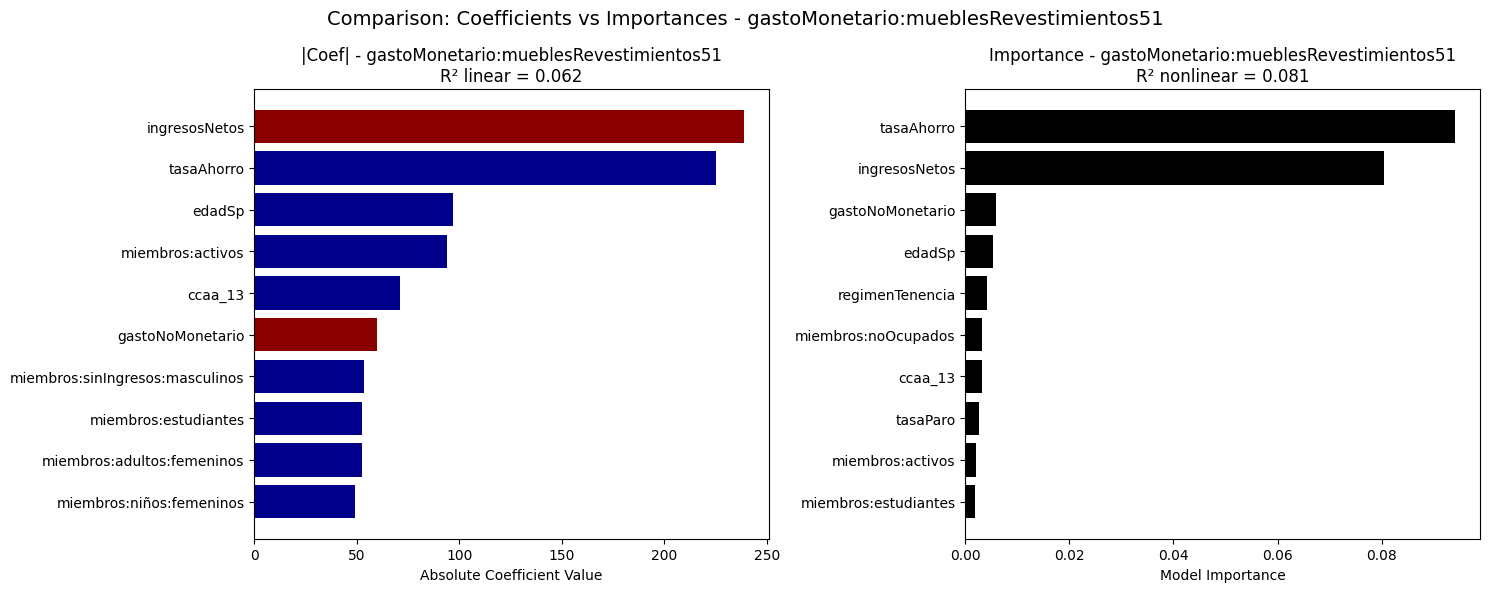

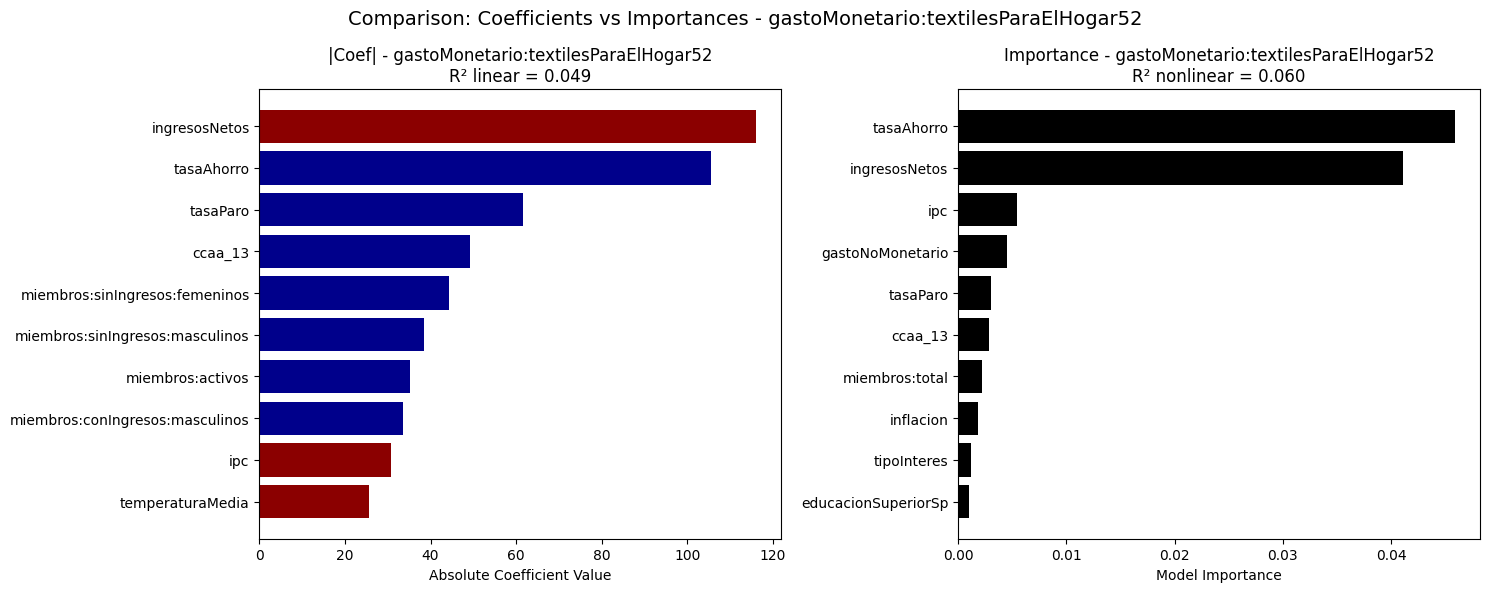

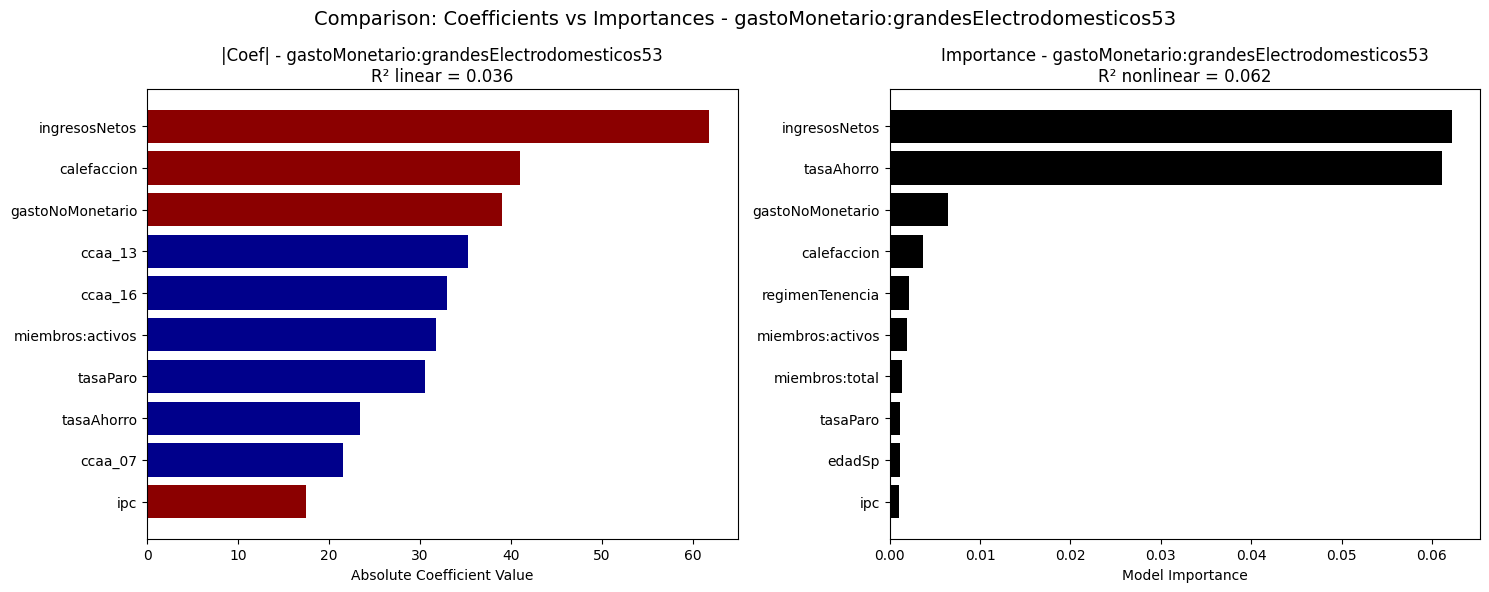

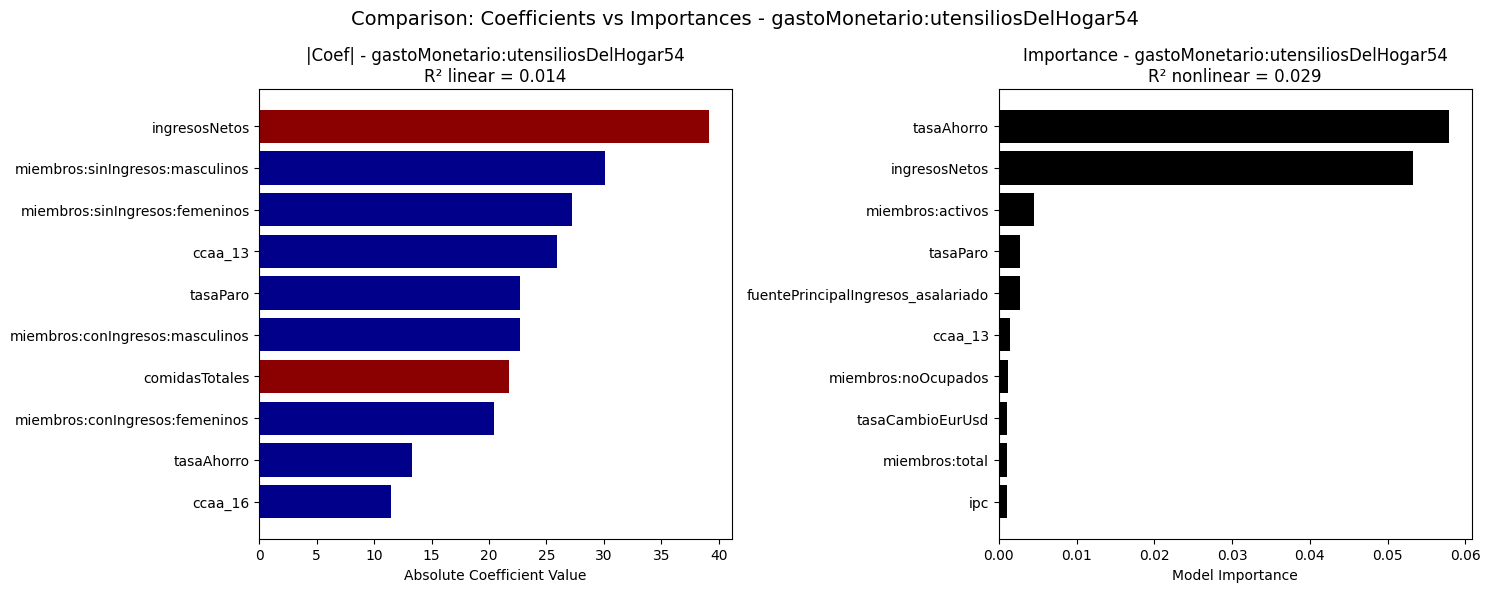

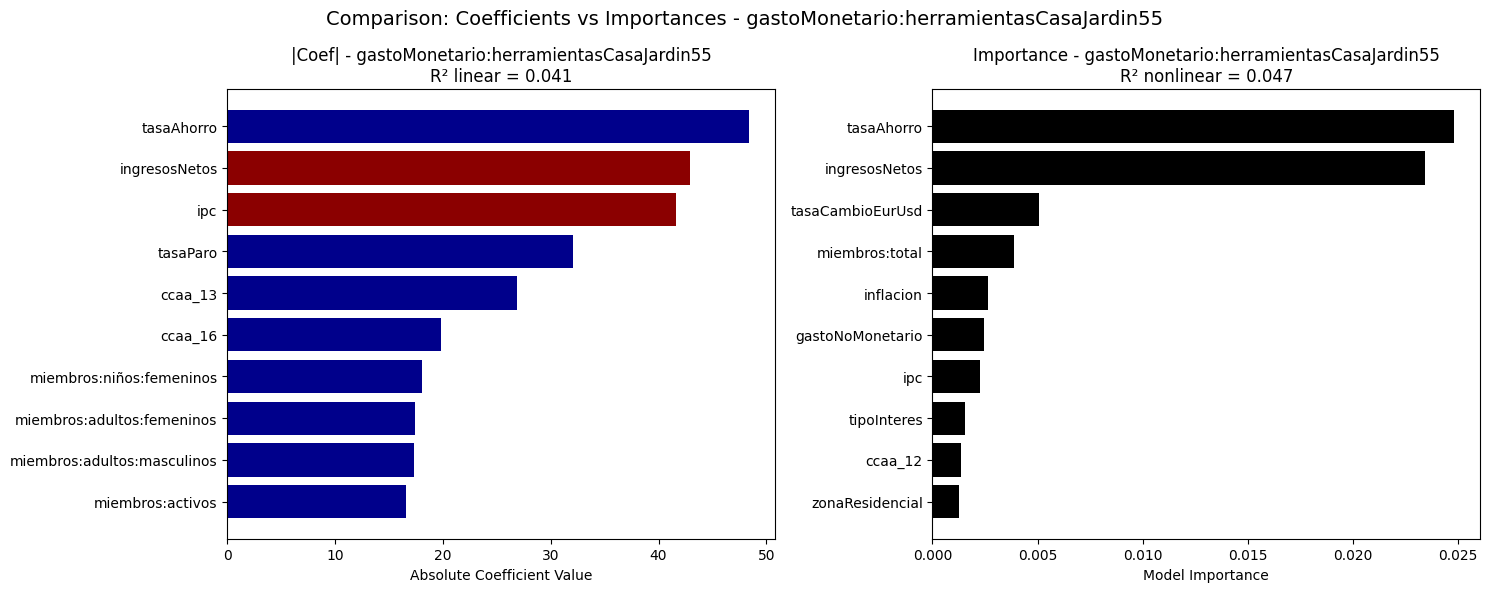

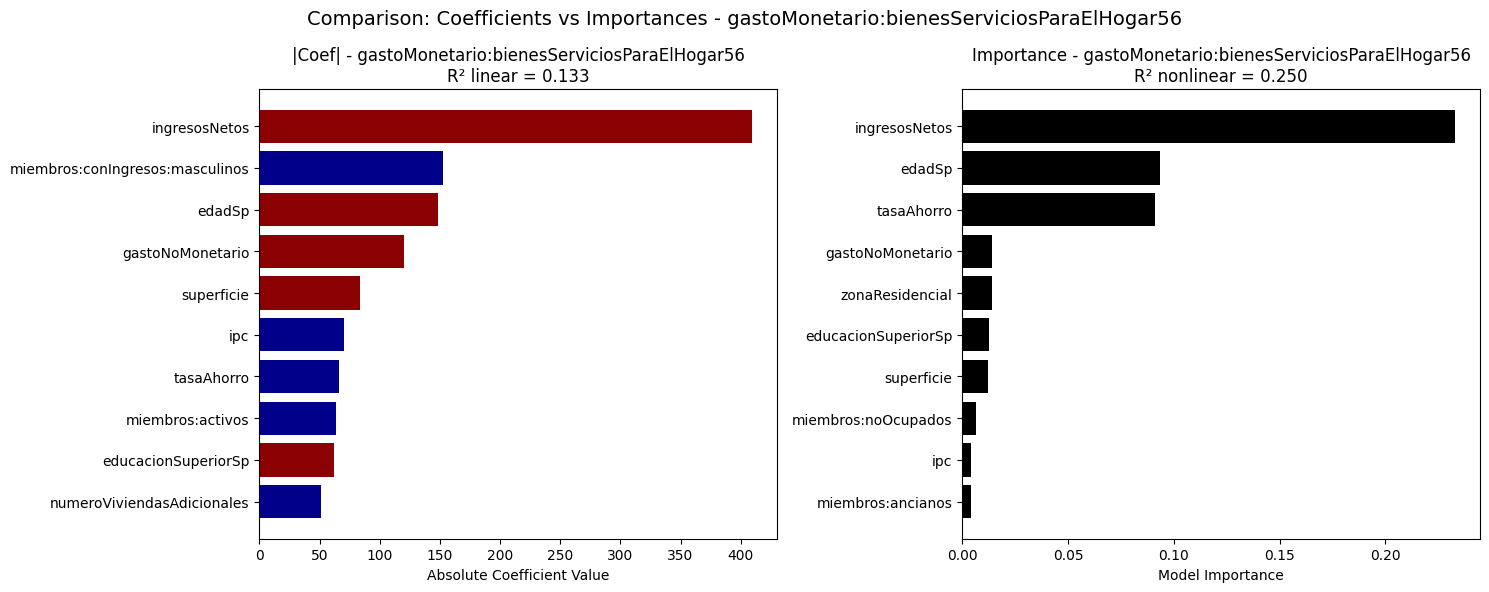

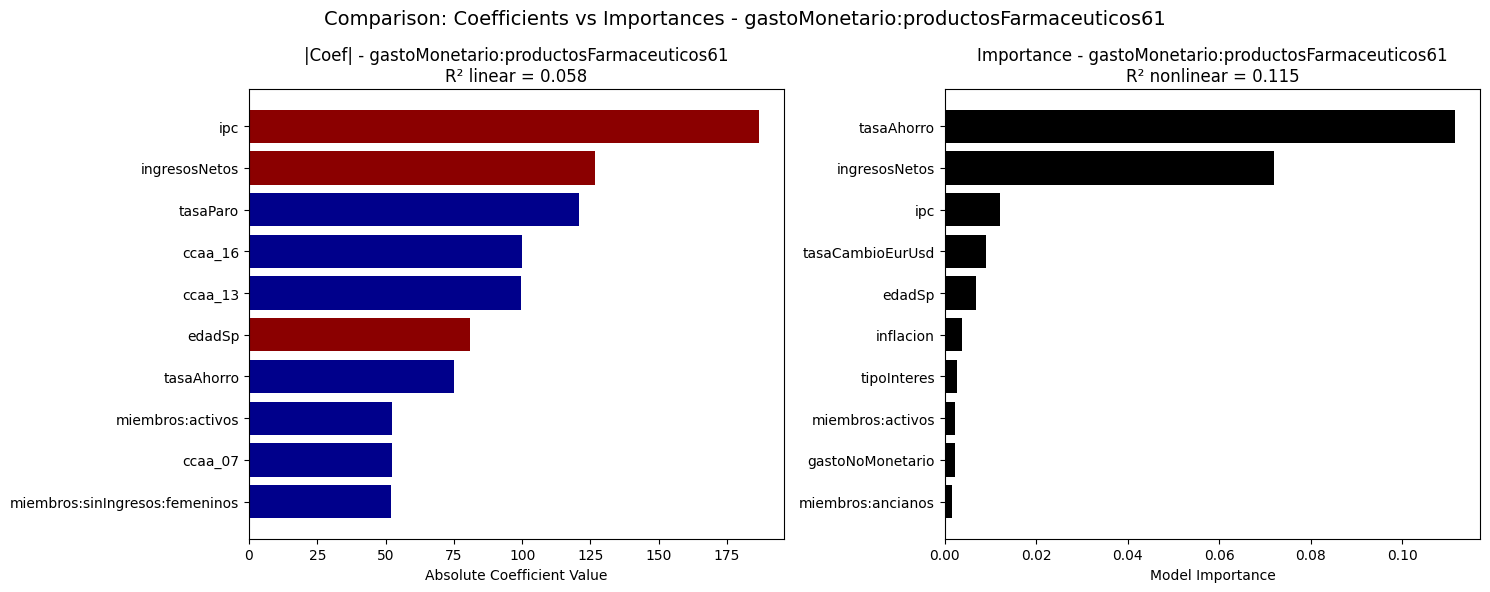

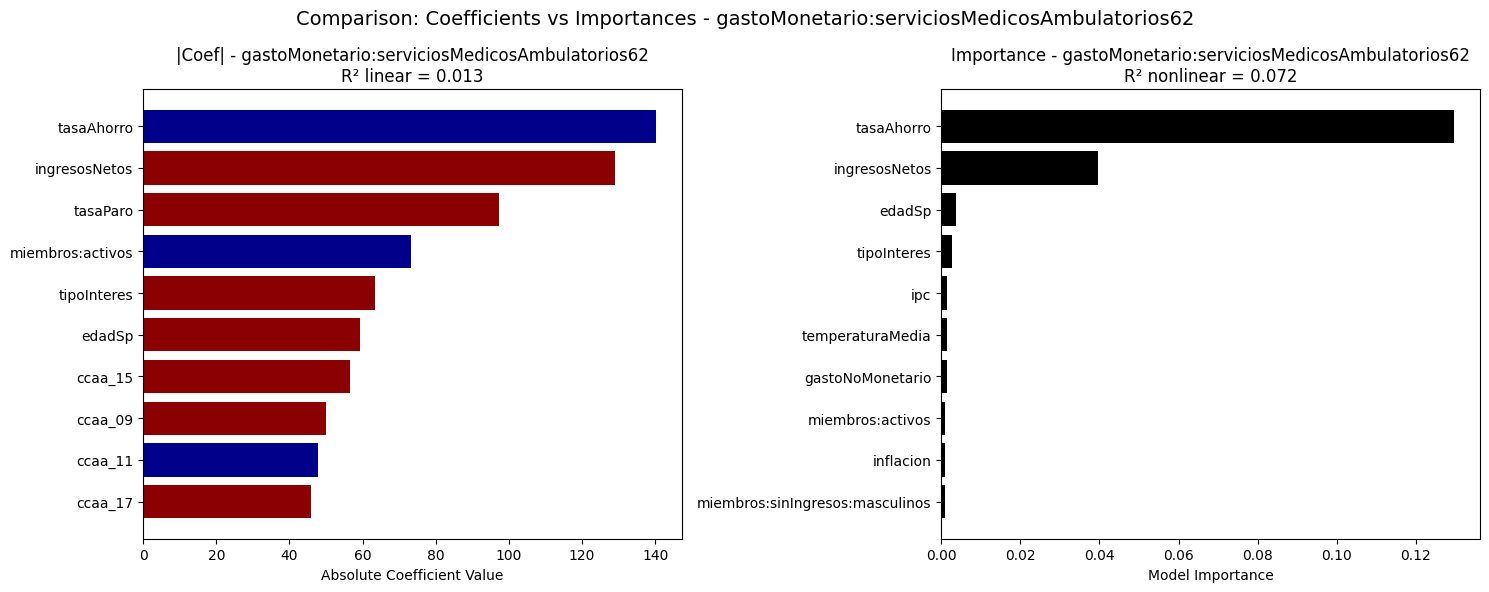

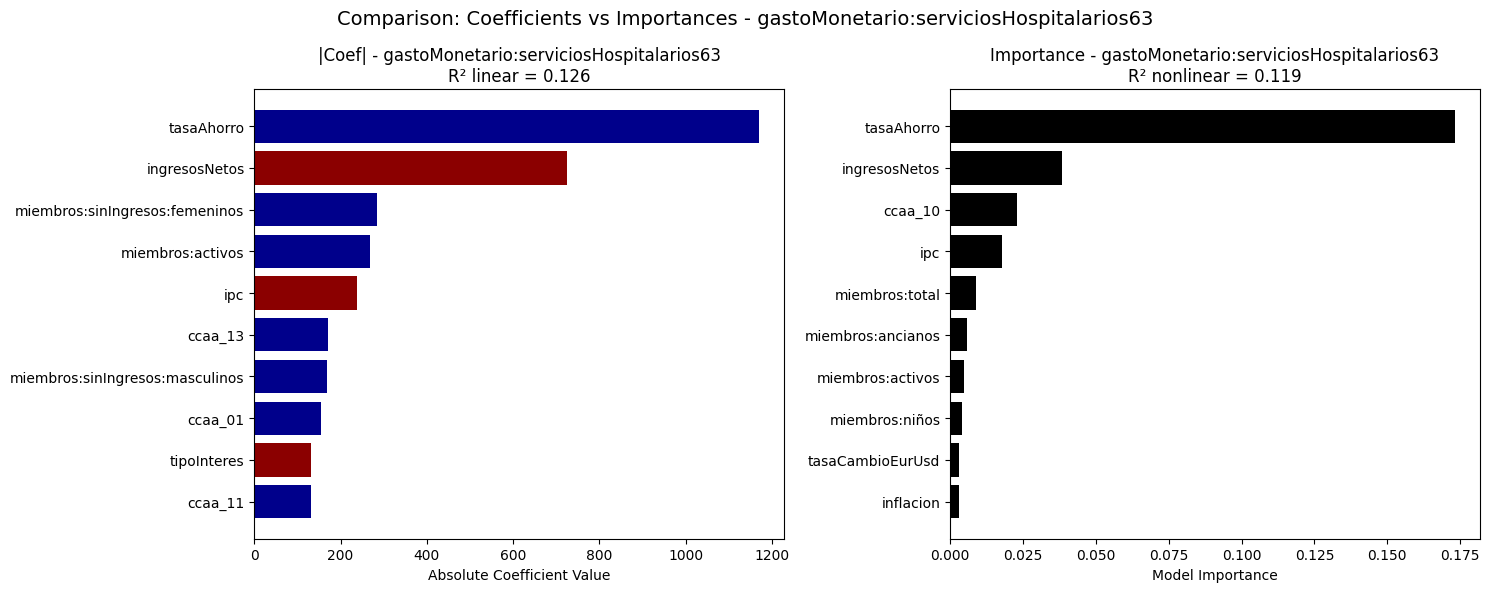

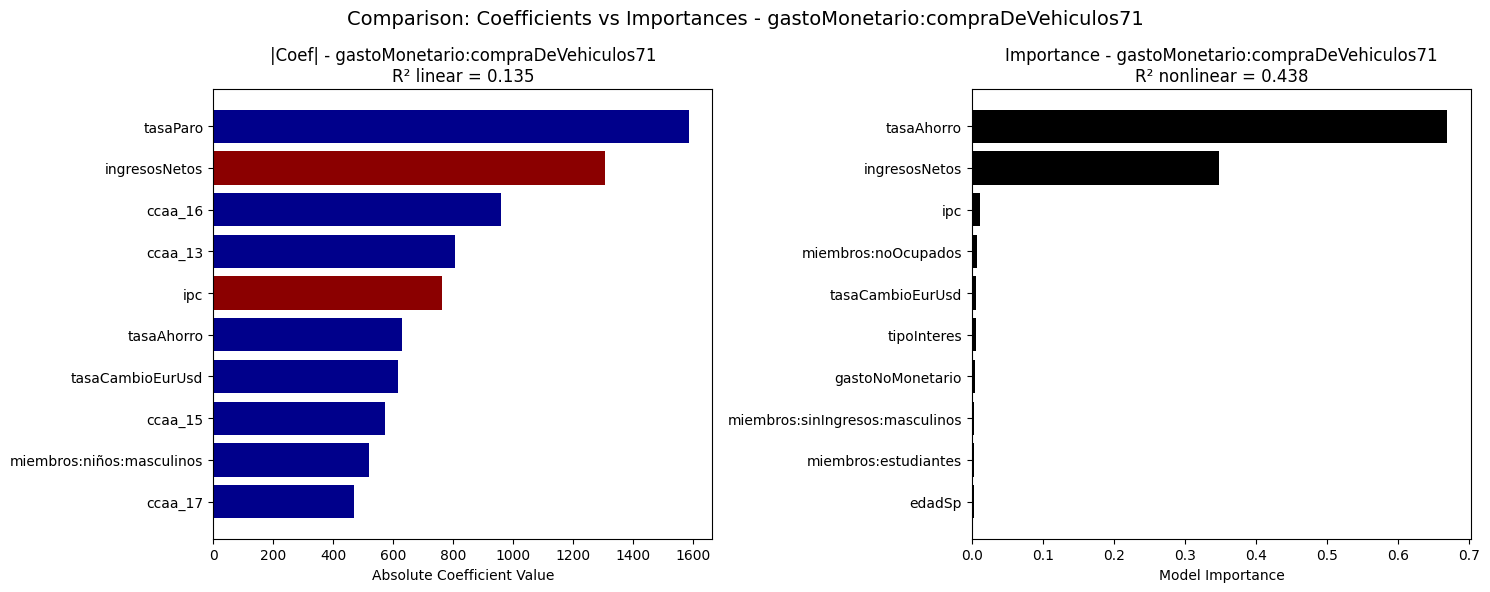

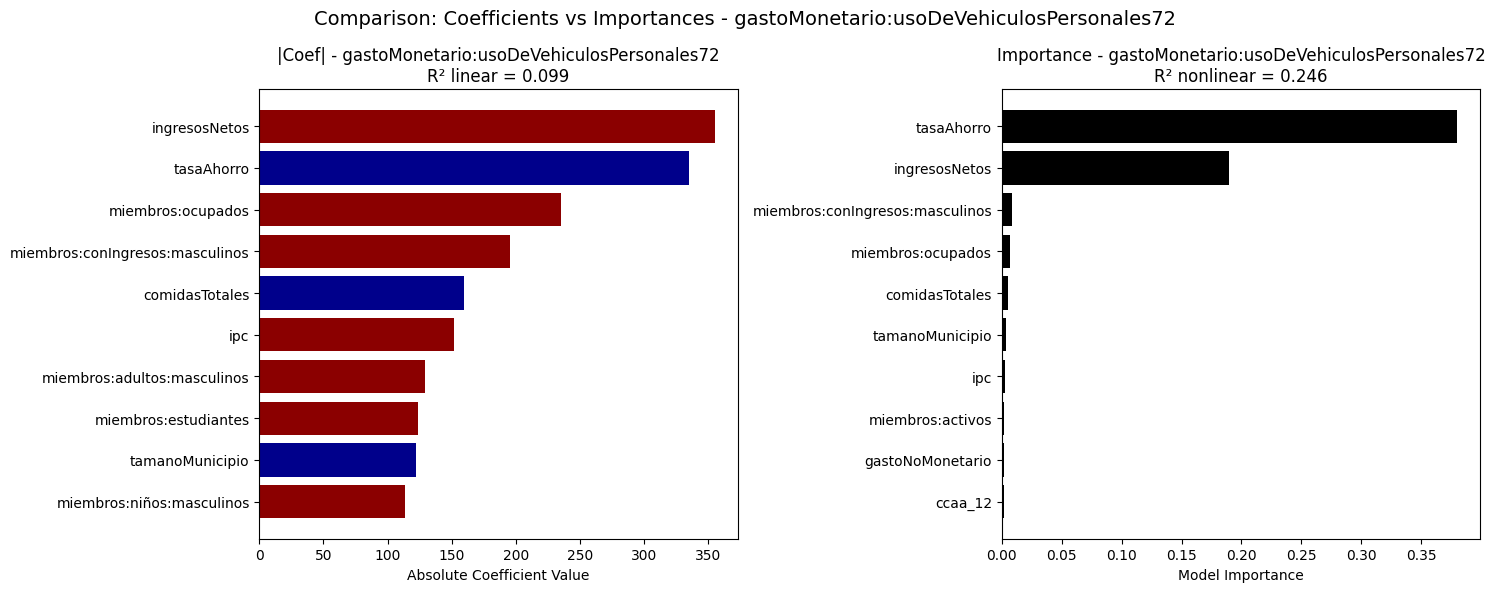

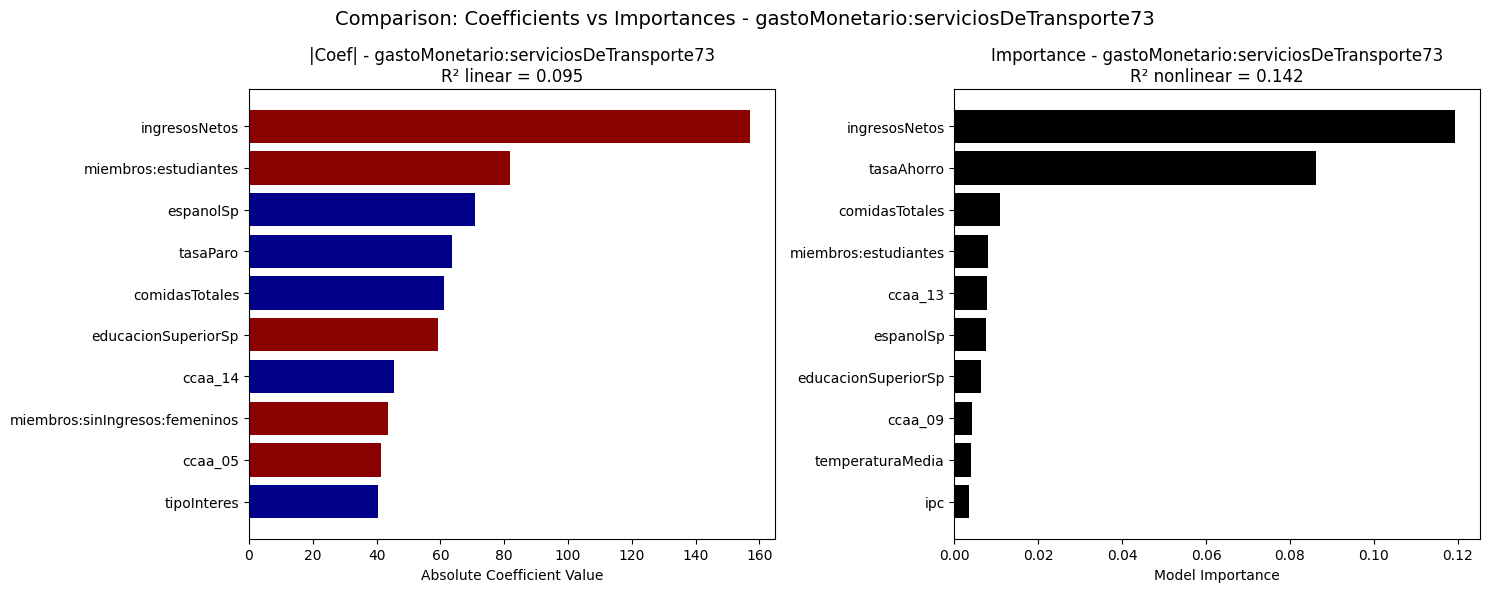

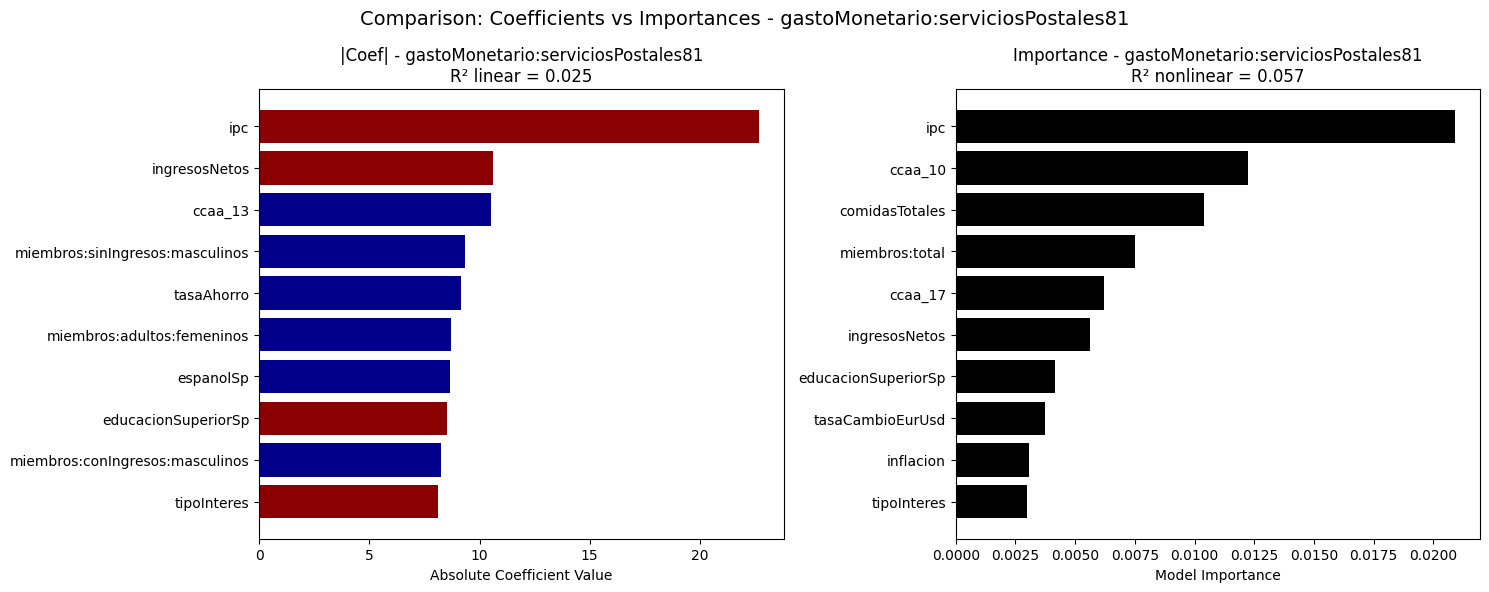

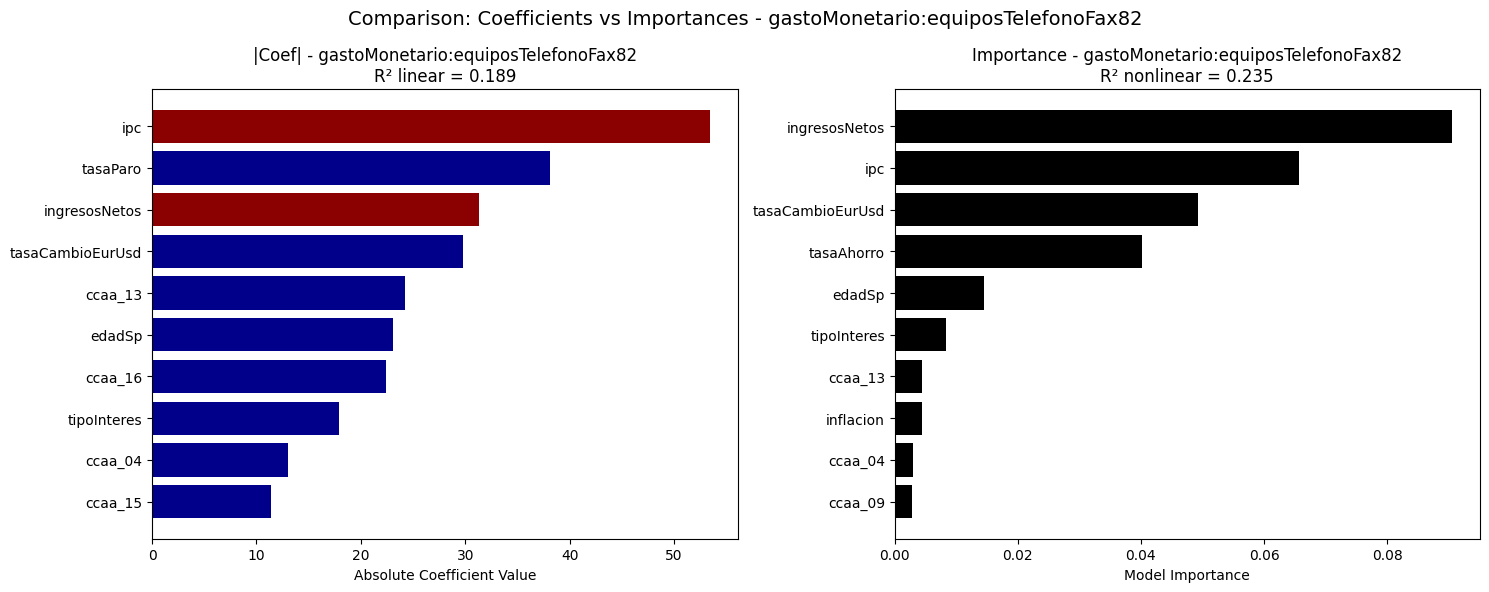

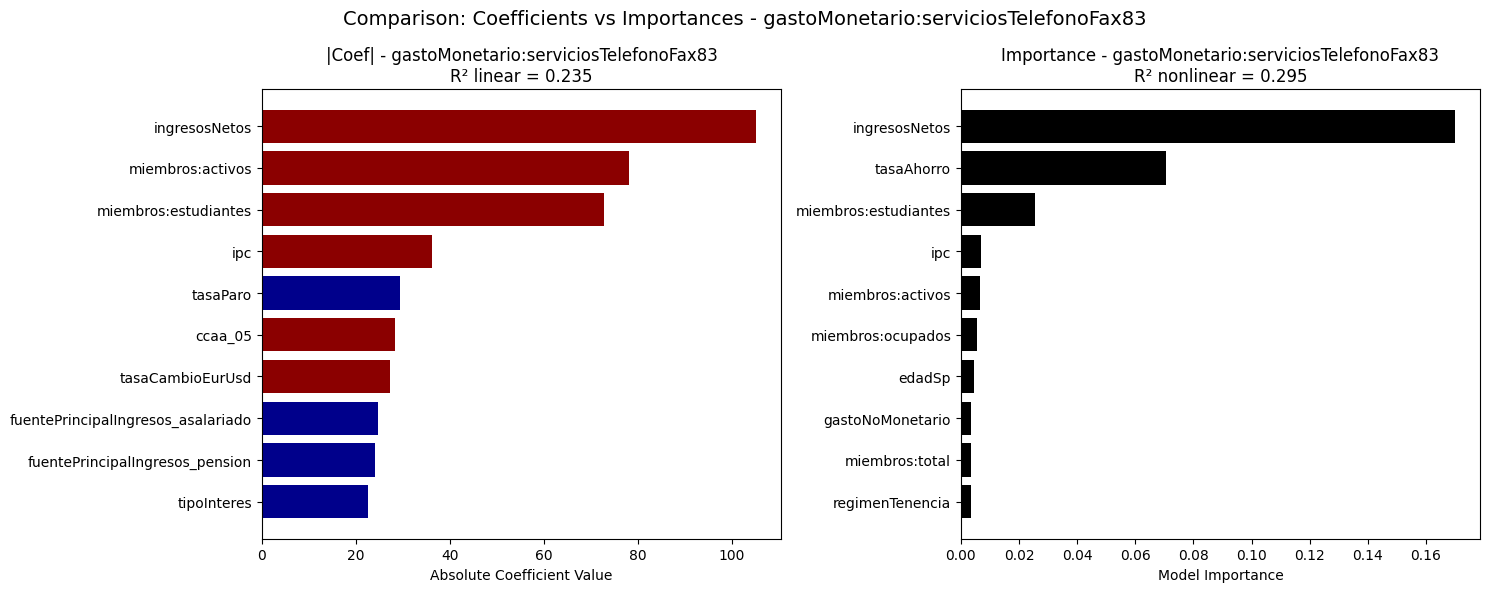

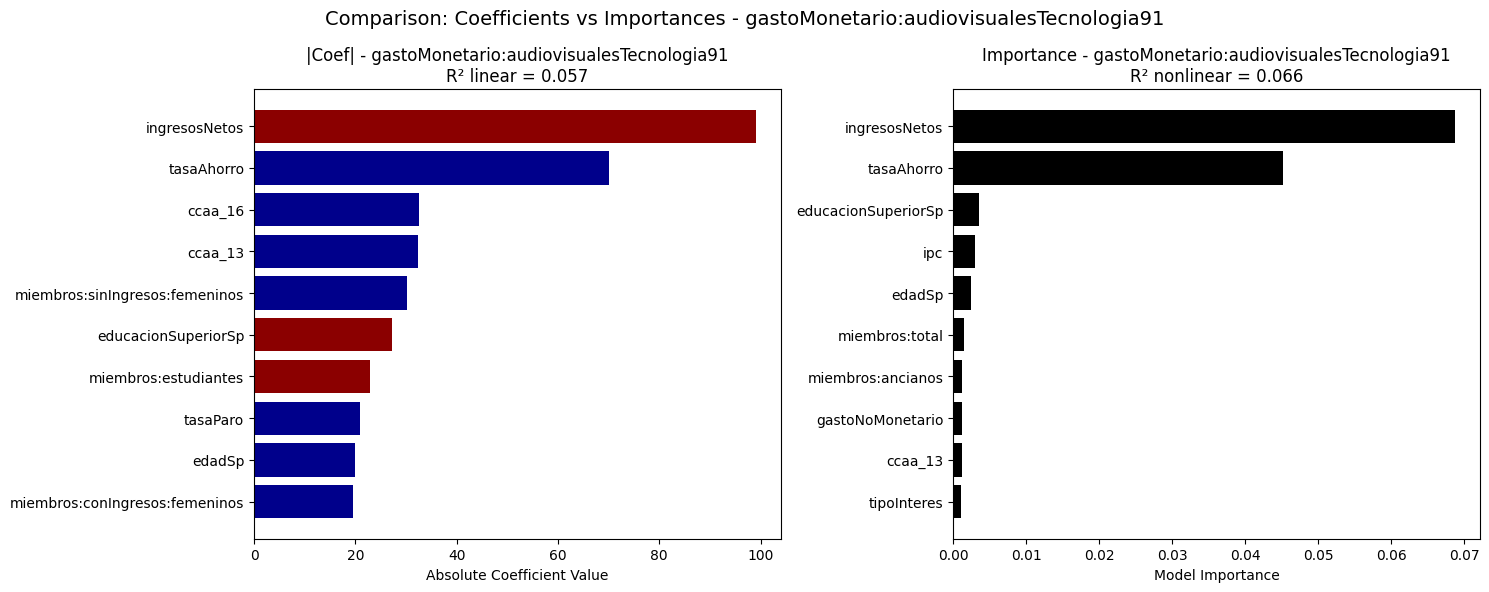

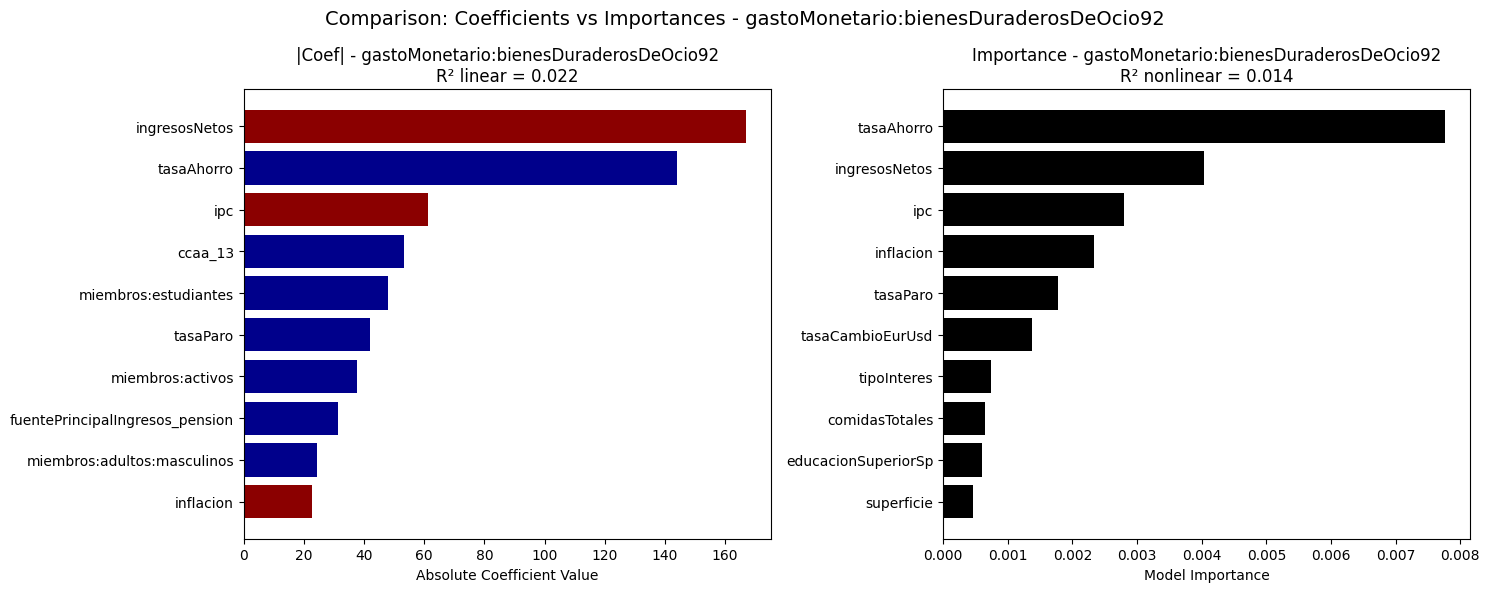

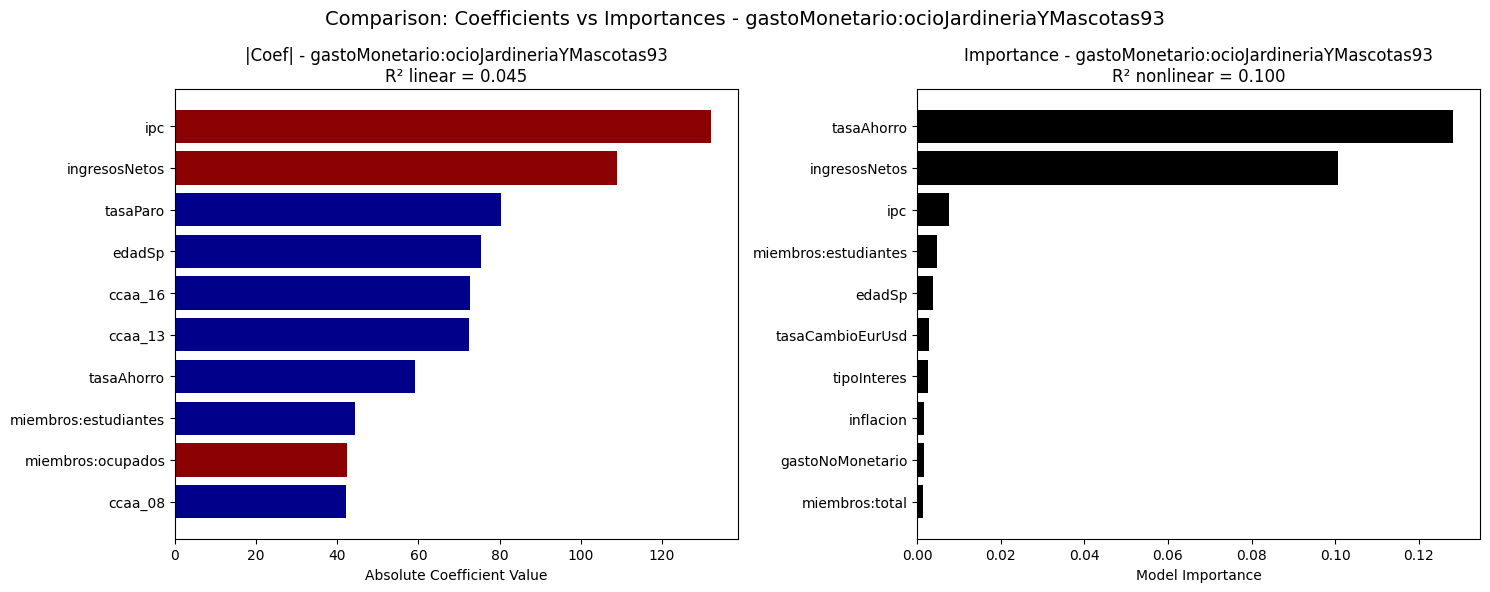

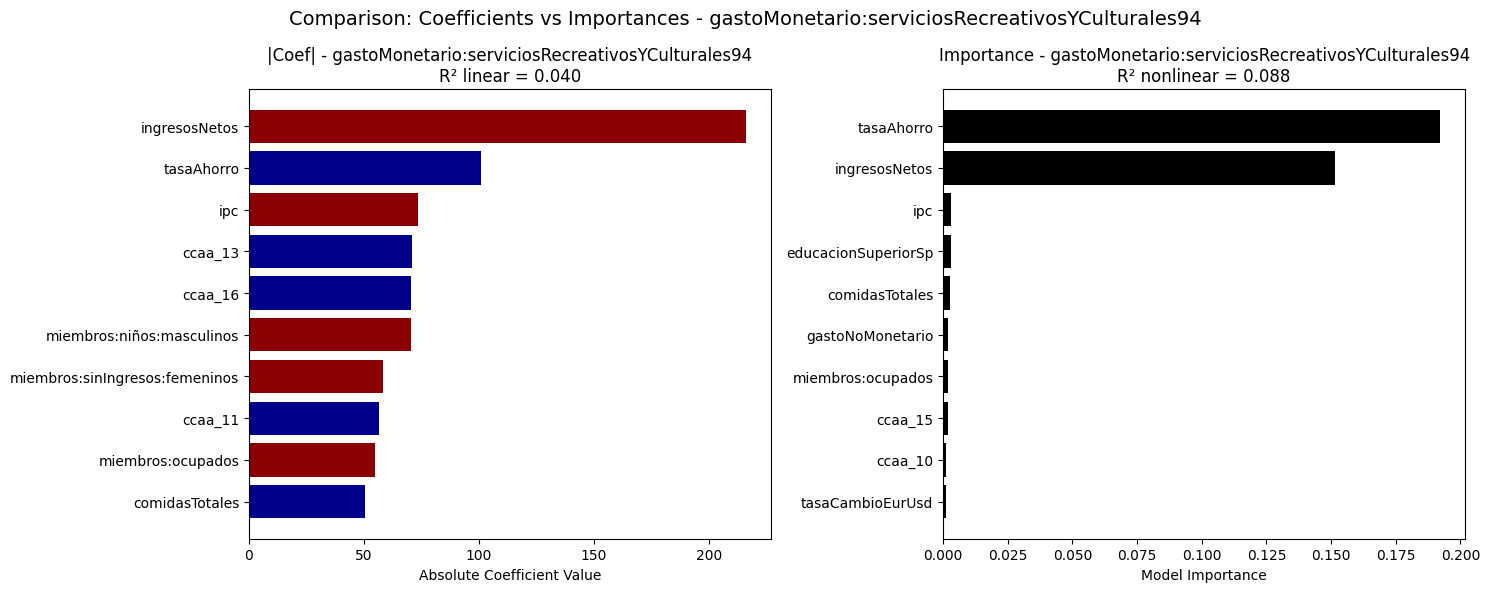

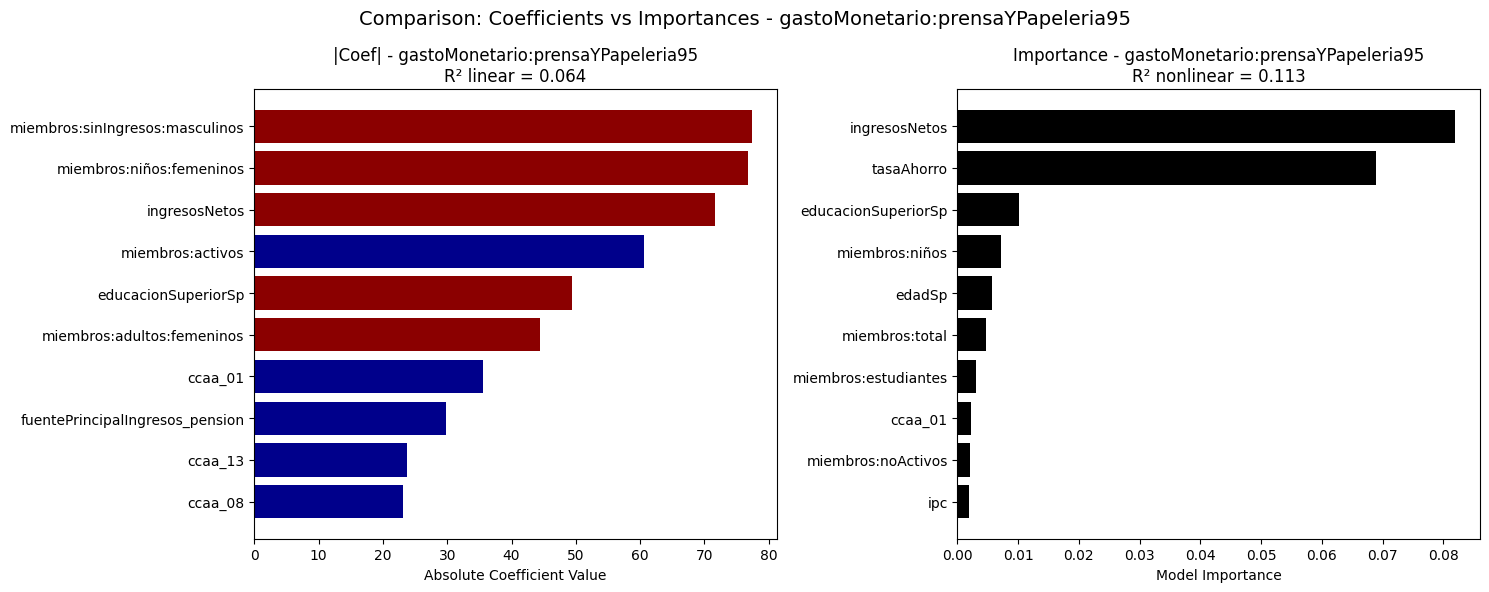

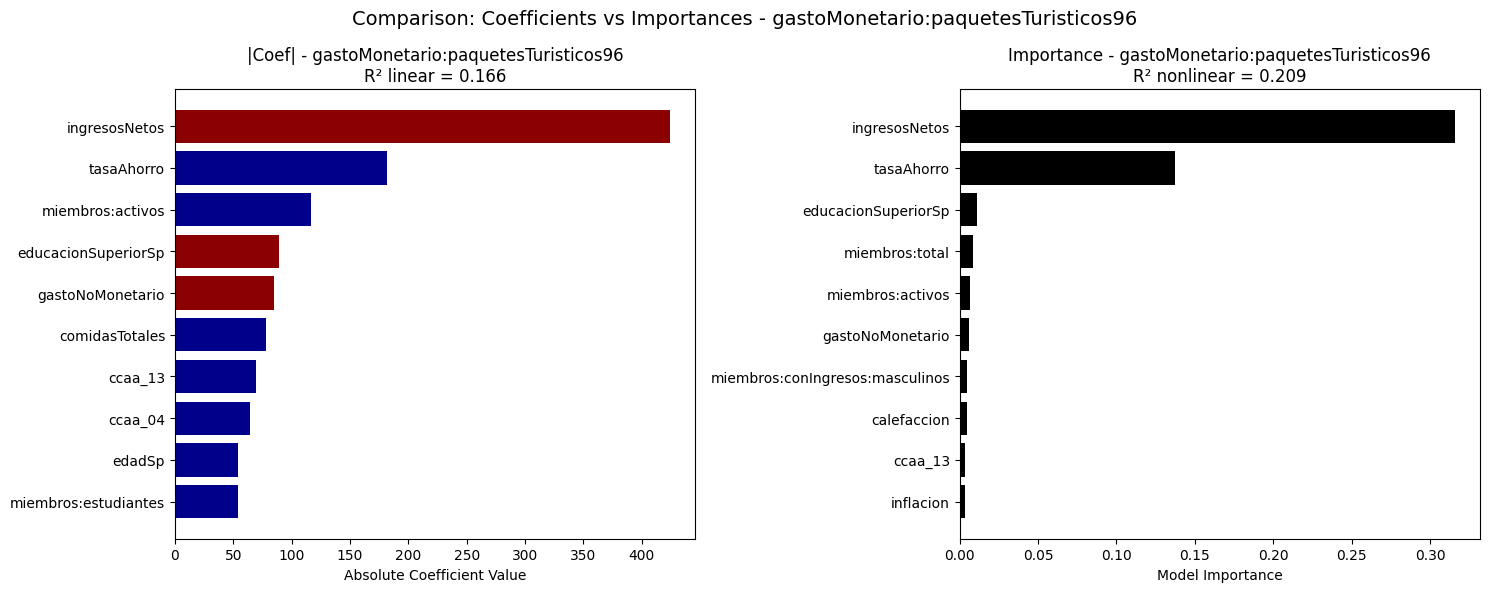

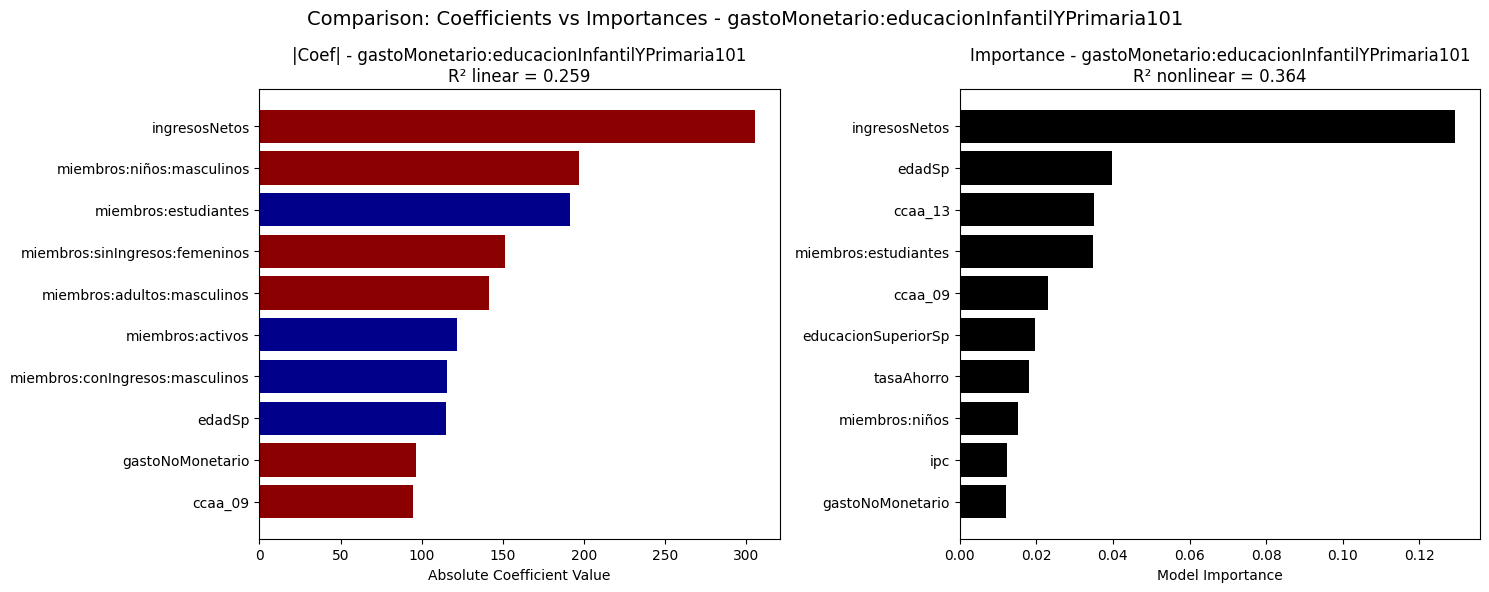

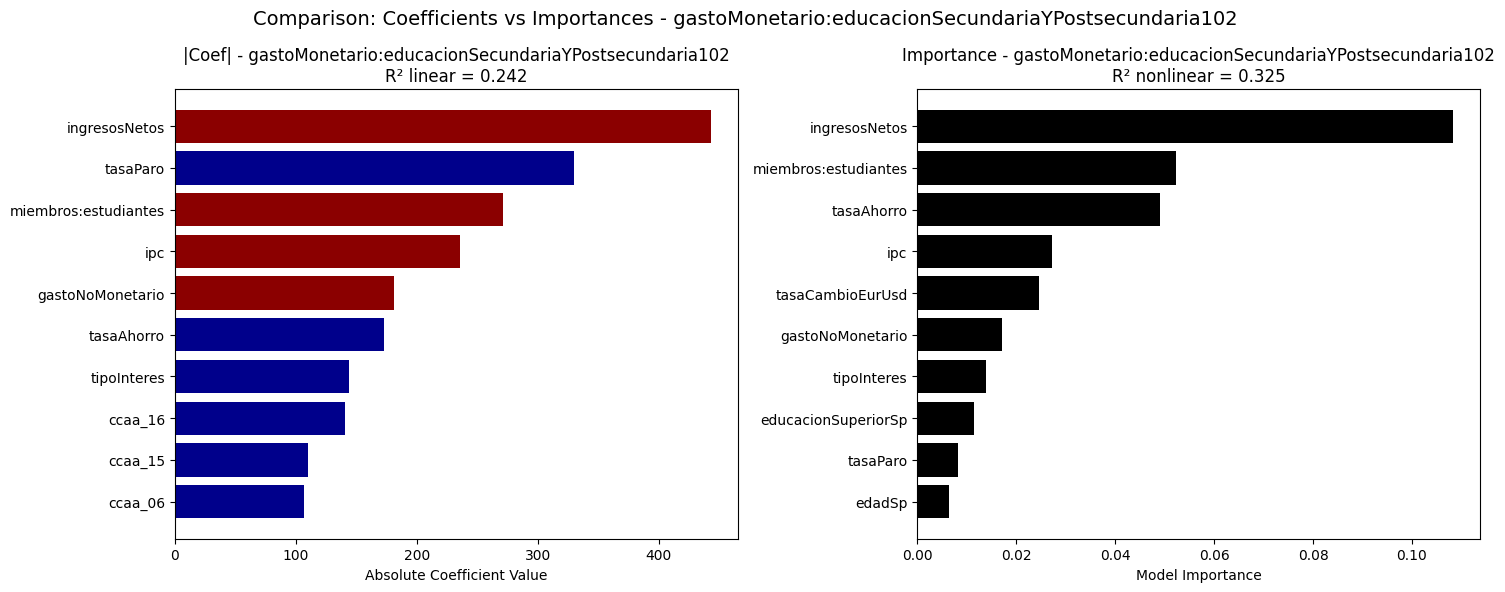

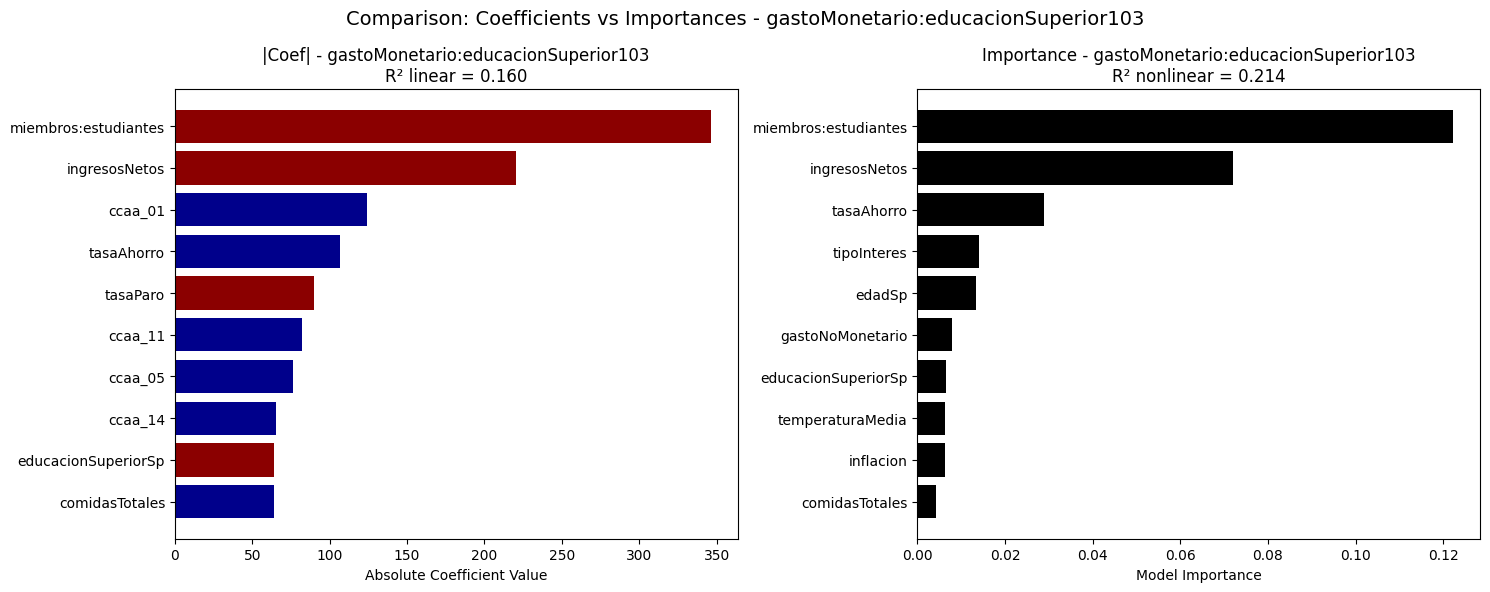

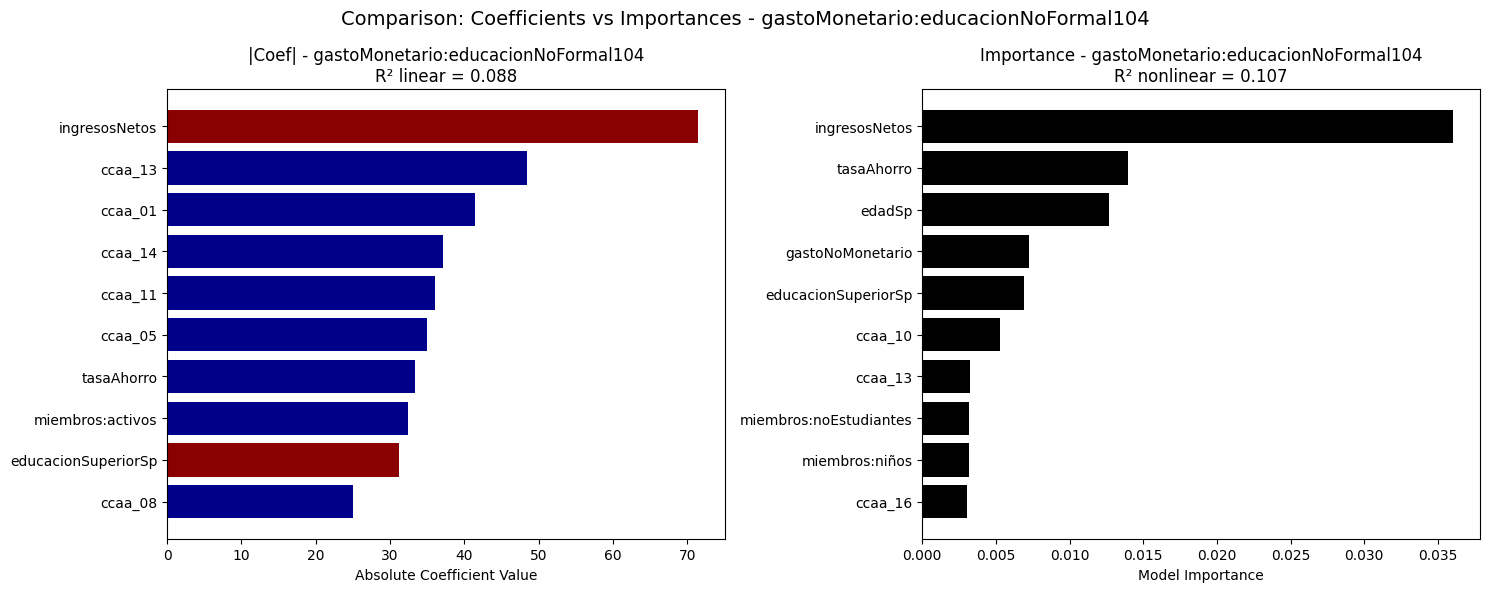

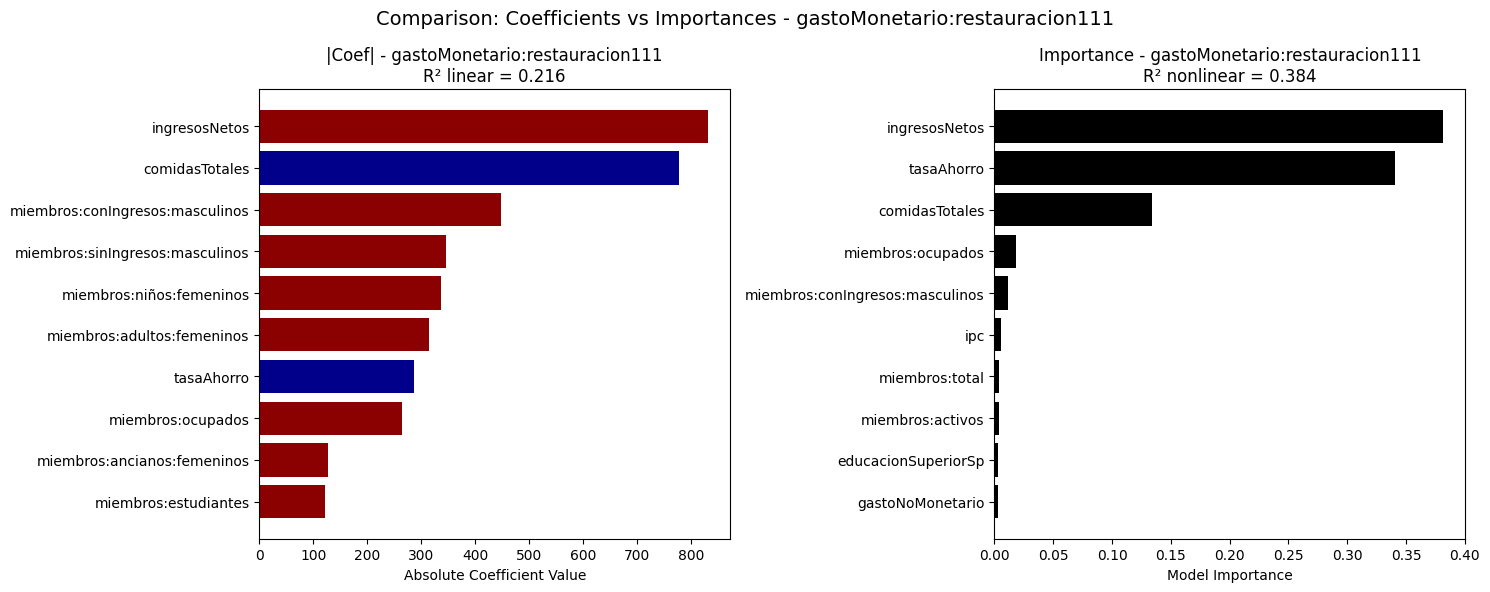

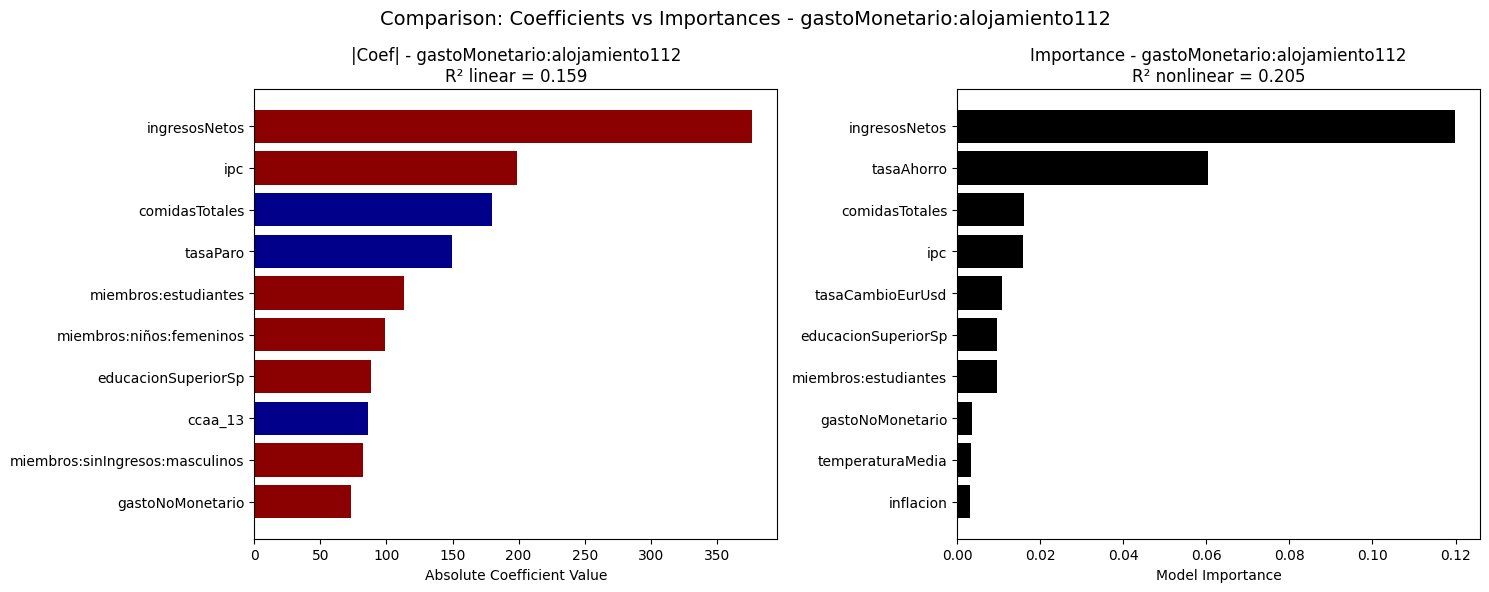

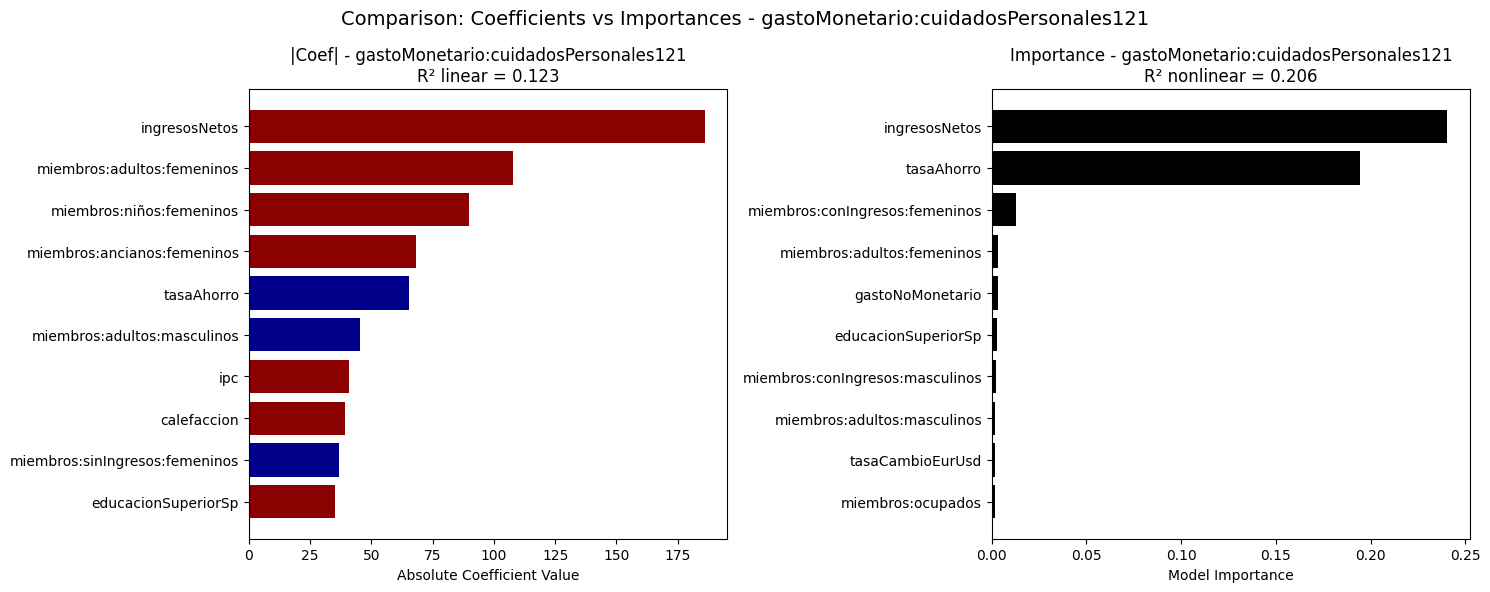

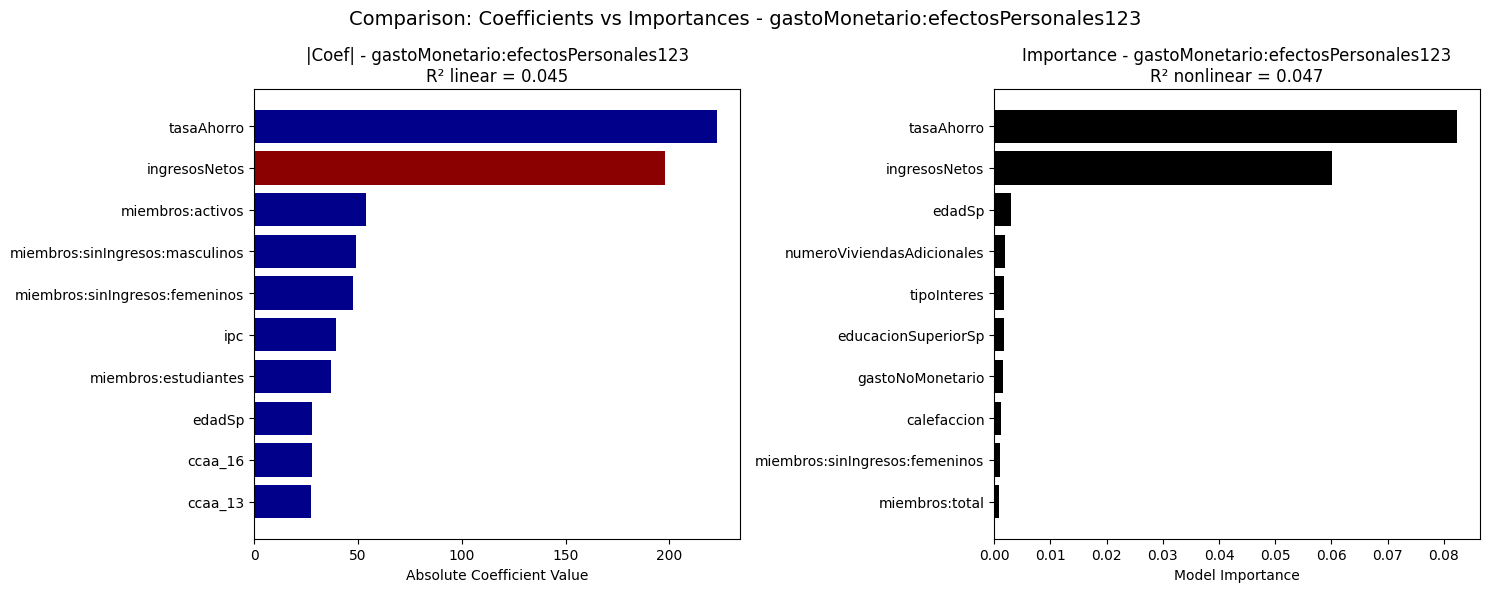

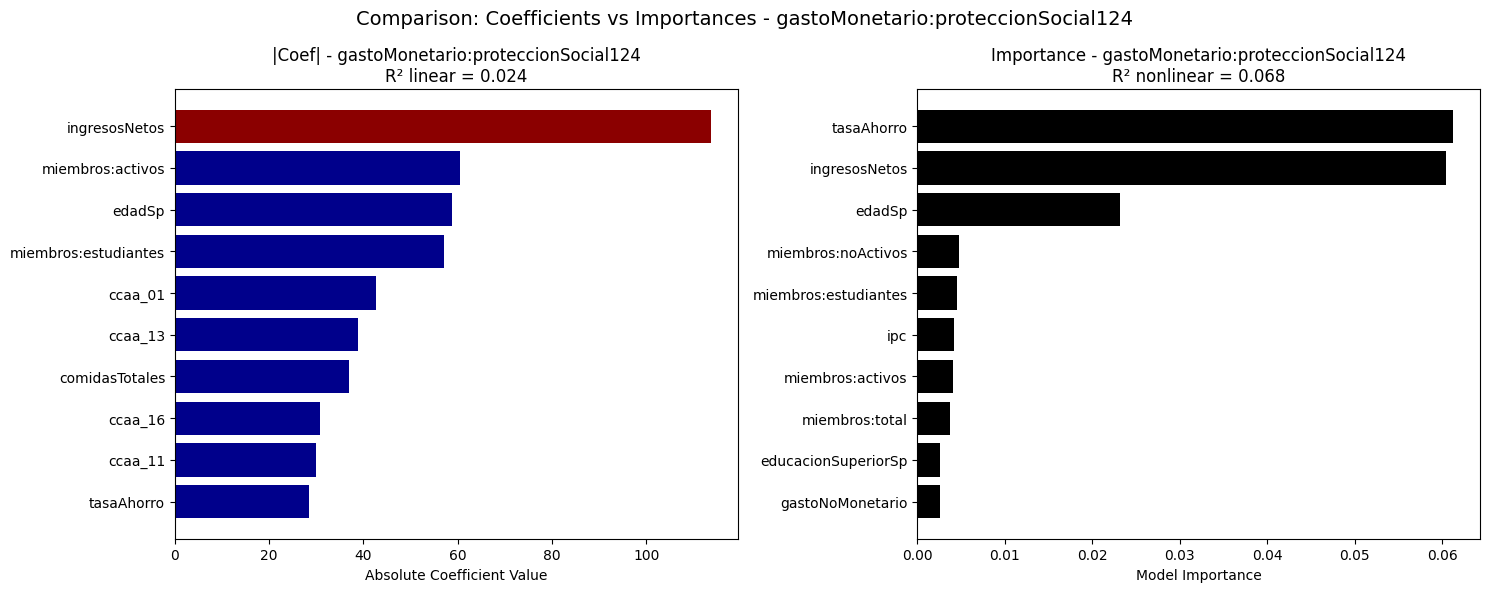

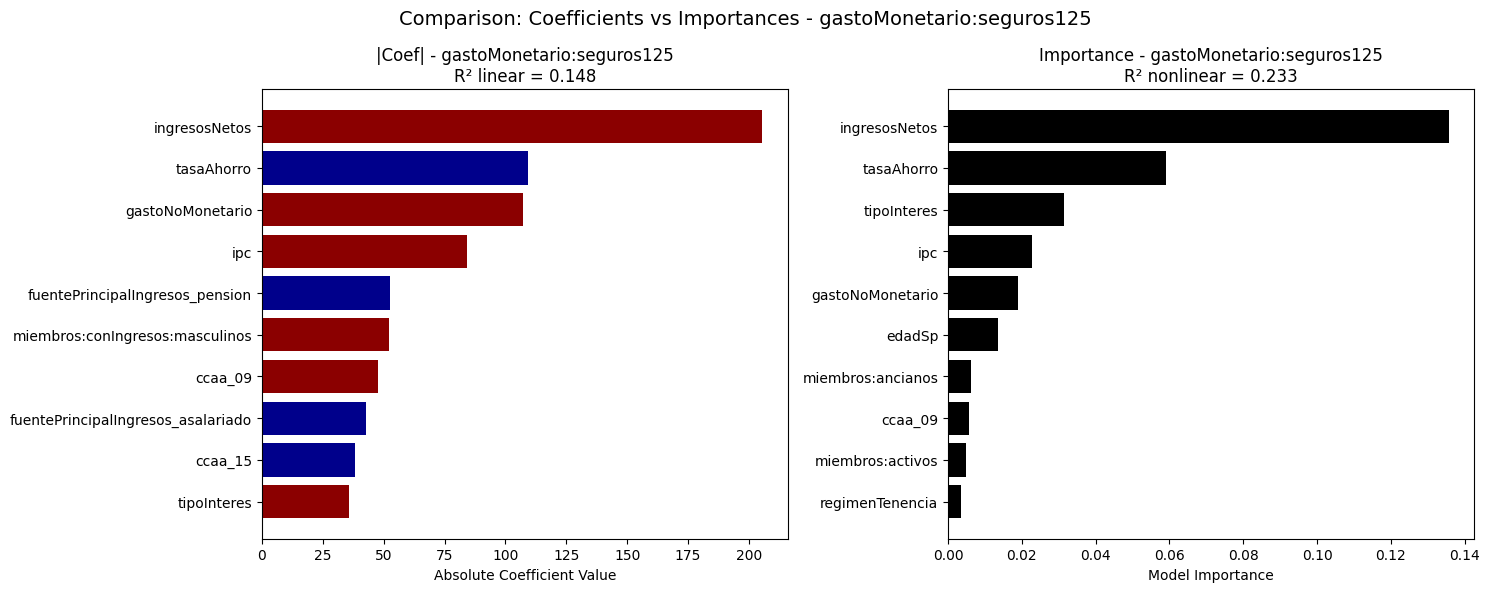

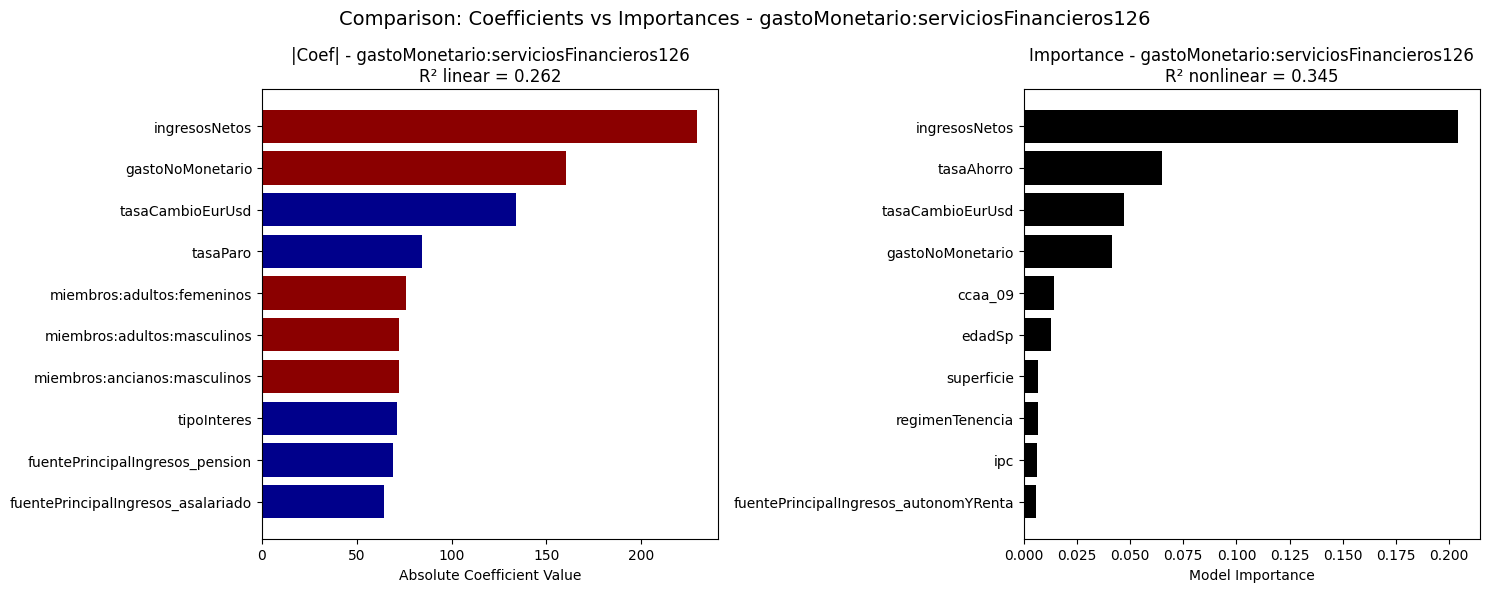

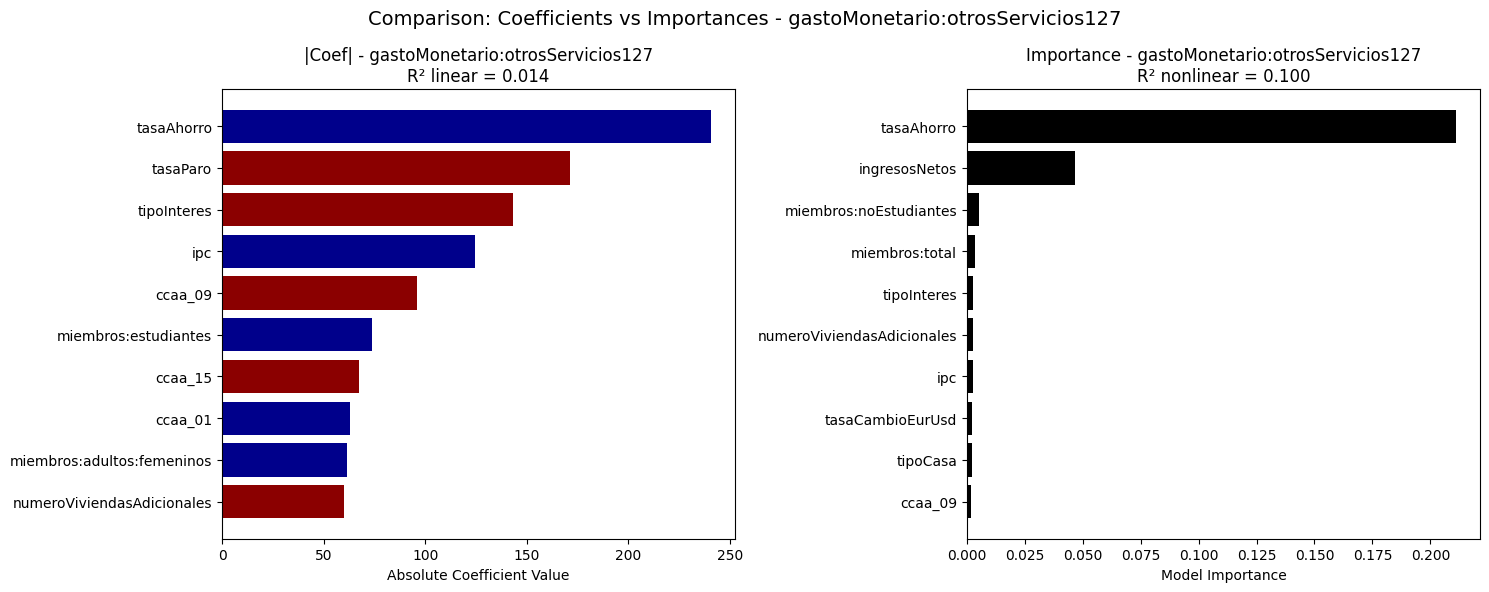

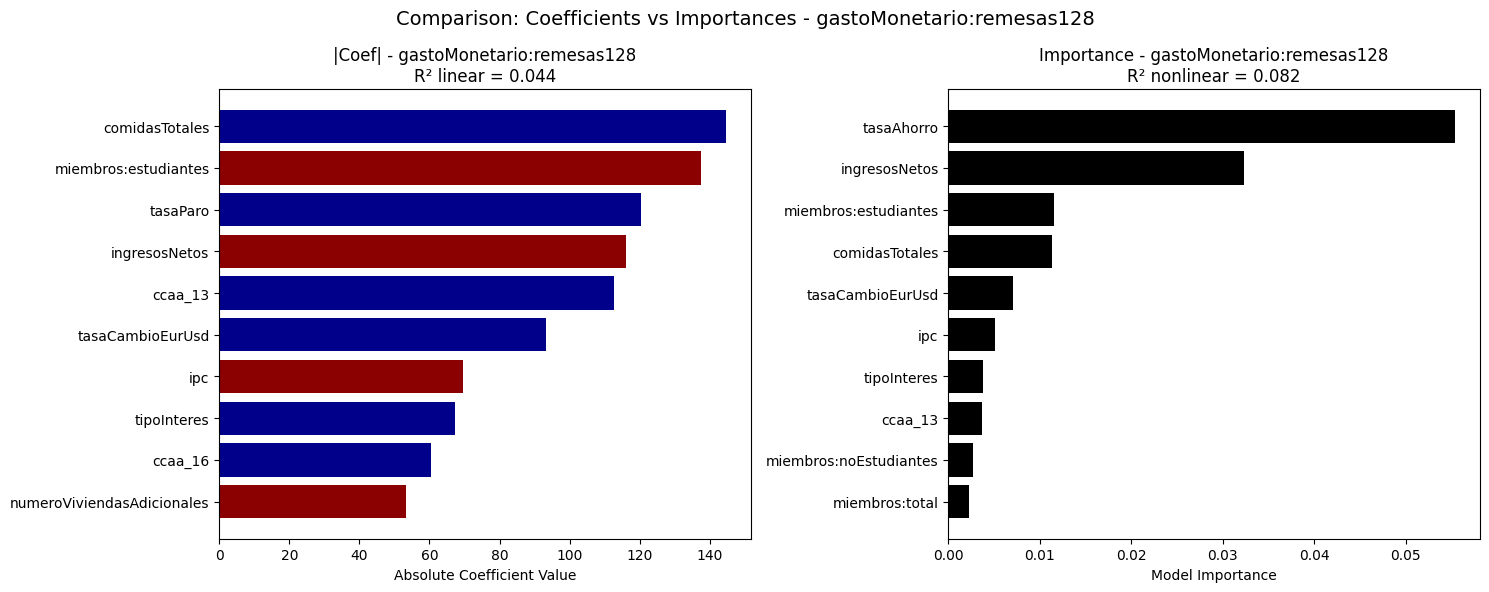

In [21]:
compare_coefficients_and_importances_with_r2(
    lineal_coefs_df,
    nonlineal_importances_df,
    metrics_lineal_df,
    metrics_nonlineal_df
)

### Tabla comparativa de la métrica R2

In [22]:
metrics_lineal_df

Gasto        R2  R2 Ajustado  \
0       gastoMonetario:alquileresRealesDeLaVivienda41  0.523924     0.523715   
1   gastoMonetario:electricidadGasOtrosCombustibles45  0.324479     0.324392   
2                   gastoMonetario:suministroDeAgua44  0.323754     0.323679   
3              gastoMonetario:productosAlimenticios11  0.298864     0.298781   
4              gastoMonetario:serviciosFinancieros126  0.262175     0.261987   
5        gastoMonetario:educacionInfantilYPrimaria101  0.259463     0.258987   
6   gastoMonetario:educacionSecundariaYPostsecunda...  0.241920     0.241525   
7               gastoMonetario:serviciosTelefonoFax83  0.235081     0.234985   
8                      gastoMonetario:restauracion111  0.215920     0.215805   
9                 gastoMonetario:equiposTelefonoFax82  0.189330     0.189063   
10                gastoMonetario:paquetesTuristicos96  0.165921     0.165656   
11                gastoMonetario:educacionSuperior103  0.160332     0.159815   
12                      gastoMonetario:alojamiento112  0.158635     0.158305   
13                          gastoMonetario:seguros125  0.148041     0.147884   
14                 gastoMonetario:compraDeVehiculos71  0.134880     0.134430   
15        gastoMonetario:bienesServiciosParaElHogar56  0.132840     0.132733   
16            gastoMonetario:serviciosHospitalarios63  0.126228     0.125115   
17               gastoMonetario:cuidadosPersonales121  0.122550     0.122450   
18              gastoMonetario:bebidasNoAlcoholicas12  0.120636     0.120519   
19          gastoMonetario:usoDeVehiculosPersonales72  0.098601     0.098459   
20             gastoMonetario:serviciosDeTransporte73  0.095107     0.094876   
21                 gastoMonetario:articulosDeVestir31  0.093574     0.093444   
22                gastoMonetario:educacionNoFormal104  0.088410     0.087854   
23                           gastoMonetario:calzado32  0.078670     0.078502   
24                  gastoMonetario:prensaYPapeleria95  0.064288     0.064117   
25             gastoMonetario:mueblesRevestimientos51  0.061919     0.061688   
26                            gastoMonetario:tabaco22  0.060915     0.060630   
27            gastoMonetario:productosFarmaceuticos61  0.057726     0.057548   
28           gastoMonetario:audiovisualesTecnologia91  0.057251     0.057051   
29         gastoMonetario:mantenimientoDeLaVivienda43  0.055876     0.055638   
30                gastoMonetario:bebidasAlcoholicas21  0.051942     0.051781   
31               gastoMonetario:textilesParaElHogar52  0.048910     0.048645   
32                gastoMonetario:efectosPersonales123  0.045047     0.044861   
33           gastoMonetario:ocioJardineriaYMascotas93  0.044911     0.044712   
34                          gastoMonetario:remesas128  0.043928     0.043637   
35            gastoMonetario:herramientasCasaJardin55  0.041197     0.040886   
36   gastoMonetario:serviciosRecreativosYCulturales94  0.040444     0.040273   
37          gastoMonetario:grandesElectrodomesticos53  0.036012     0.035815   
38                 gastoMonetario:serviciosPostales81  0.025434     0.024968   
39                 gastoMonetario:proteccionSocial124  0.023770     0.023474   
40             gastoMonetario:bienesDuraderosDeOcio92  0.022045     0.021668   
41                   gastoMonetario:otrosServicios127  0.014404     0.014068   
42                gastoMonetario:utensiliosDelHogar54  0.014248     0.013996   
43      gastoMonetario:serviciosMedicosAmbulatorios62  0.012605     0.012409   

             AIC           BIC       N     BP LM stat     BP p-value  \
0   1.875767e+06  1.876217e+06  105027    5530.664442   0.000000e+00   
1   5.626647e+06  5.627165e+06  361880    6981.550414   0.000000e+00   
2   5.633987e+06  5.634430e+06  360364     857.753021  4.899444e-154   
3   6.565974e+06  6.566449e+06  362510  225394.442430   0.000000e+00   
4   2.528033e+06  2.528442e+06  156592    3366.764823   0.000000e+00   
5   1.063046e+0

In [23]:
metrics_nonlineal_df

Target        R2
0       gastoMonetario:alquileresRealesDeLaVivienda41  0.743899
1              gastoMonetario:productosAlimenticios11  0.438651
2                  gastoMonetario:compraDeVehiculos71  0.438017
3                      gastoMonetario:restauracion111  0.383993
4                   gastoMonetario:suministroDeAgua44  0.365967
5        gastoMonetario:educacionInfantilYPrimaria101  0.363694
6   gastoMonetario:electricidadGasOtrosCombustibles45  0.362249
7              gastoMonetario:serviciosFinancieros126  0.345409
8   gastoMonetario:educacionSecundariaYPostsecunda...  0.324712
9               gastoMonetario:serviciosTelefonoFax83  0.294516
10        gastoMonetario:bienesServiciosParaElHogar56  0.249706
11          gastoMonetario:usoDeVehiculosPersonales72  0.245697
12                gastoMonetario:equiposTelefonoFax82  0.234548
13                          gastoMonetario:seguros125  0.232758
14                gastoMonetario:educacionSuperior103  0.214037
15                gastoMonetario:paquetesTuristicos96  0.209389
16               gastoMonetario:cuidadosPersonales121  0.205769
17                      gastoMonetario:alojamiento112  0.205135
18                 gastoMonetario:articulosDeVestir31  0.198518
19              gastoMonetario:bebidasNoAlcoholicas12  0.161273
20                           gastoMonetario:calzado32  0.157475
21             gastoMonetario:serviciosDeTransporte73  0.141981
22                            gastoMonetario:tabaco22  0.118826
23            gastoMonetario:serviciosHospitalarios63  0.118585
24            gastoMonetario:productosFarmaceuticos61  0.115267
25                  gastoMonetario:prensaYPapeleria95  0.113266
26                gastoMonetario:educacionNoFormal104  0.106595
27           gastoMonetario:ocioJardineriaYMascotas93  0.099852
28                   gastoMonetario:otrosServicios127  0.099559
29   gastoMonetario:serviciosRecreativosYCulturales94  0.088447
30                gastoMonetario:bebidasAlcoholicas21  0.083724
31         gastoMonetario:mantenimientoDeLaVivienda43  0.082885
32                          gastoMonetario:remesas128  0.082321
33             gastoMonetario:mueblesRevestimientos51  0.080530
34      gastoMonetario:serviciosMedicosAmbulatorios62  0.071574
35                 gastoMonetario:proteccionSocial124  0.067771
36           gastoMonetario:audiovisualesTecnologia91  0.065756
37          gastoMonetario:grandesElectrodomesticos53  0.061671
38               gastoMonetario:textilesParaElHogar52  0.059547
39                 gastoMonetario:serviciosPostales81  0.057404
40                gastoMonetario:efectosPersonales123  0.046540
41            gastoMonetario:herramientasCasaJardin55  0.046521
42                gastoMonetario:utensiliosDelHogar54  0.028767
43             gastoMonetario:bienesDuraderosDeOcio92  0.013829

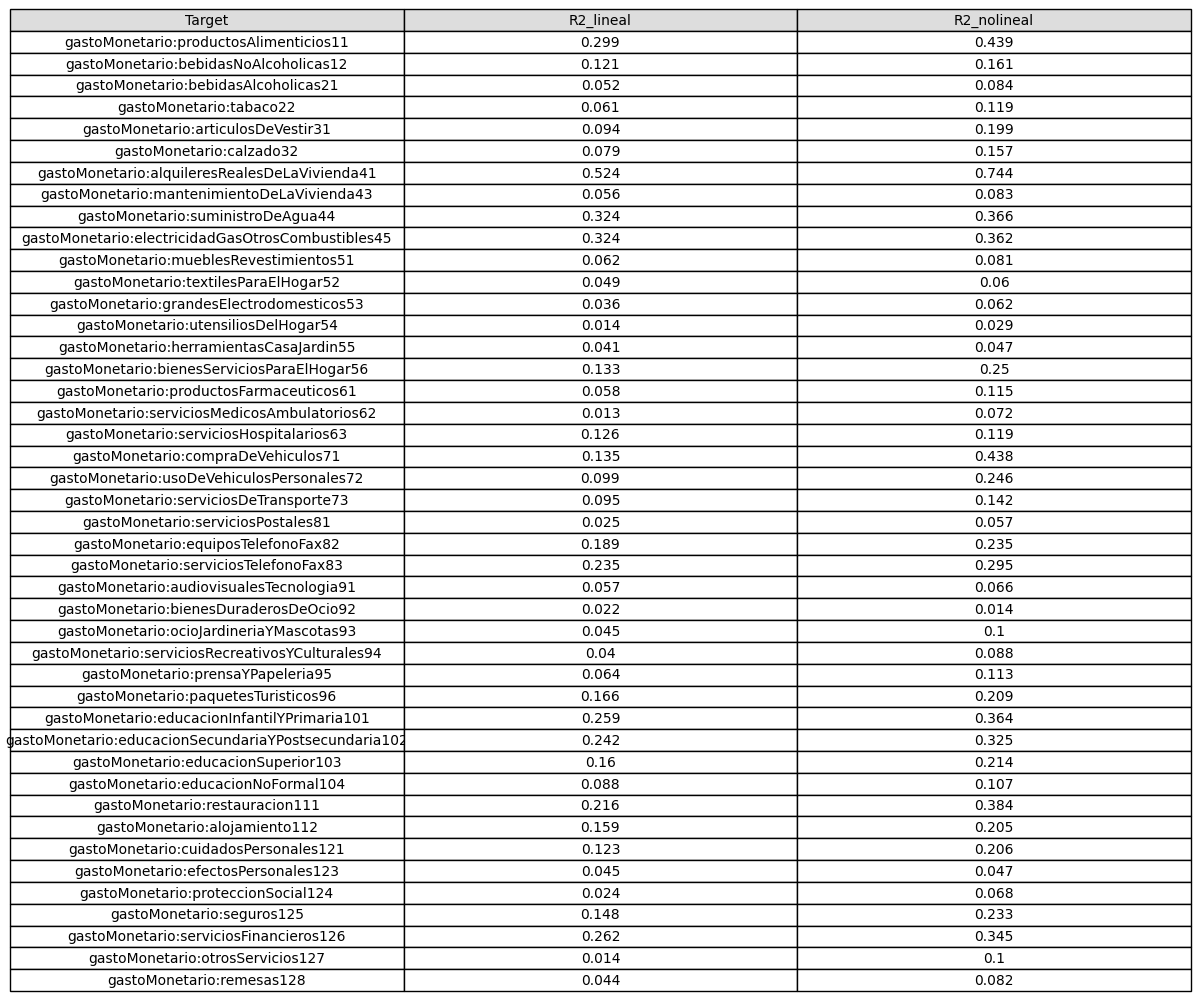

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df):
    # Fusionar ambos DataFrames por la columna correspondiente
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R2": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Extraer código numérico del Target
    merged['Codigo'] = merged['Target'].str.extract(r'(\d+)').astype(int)
    
    # Ordenar por el código
    merged.sort_values(by="Codigo", inplace=True)

    # Eliminar columna auxiliar si no la quieres mostrar
    top = merged.drop(columns="Codigo")

    # Crear tabla visual
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    tabla = ax.table(
        cellText=top.round(3).values,
        colLabels=top.columns,
        loc='center',
        cellLoc='center',
        colColours=["#dddddd"] * 3
    )
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(1.2, 1.2)

    plt.tight_layout()
    plt.show()


plot_r2_comparison_table(metrics_lineal_df, metrics_nonlineal_df)

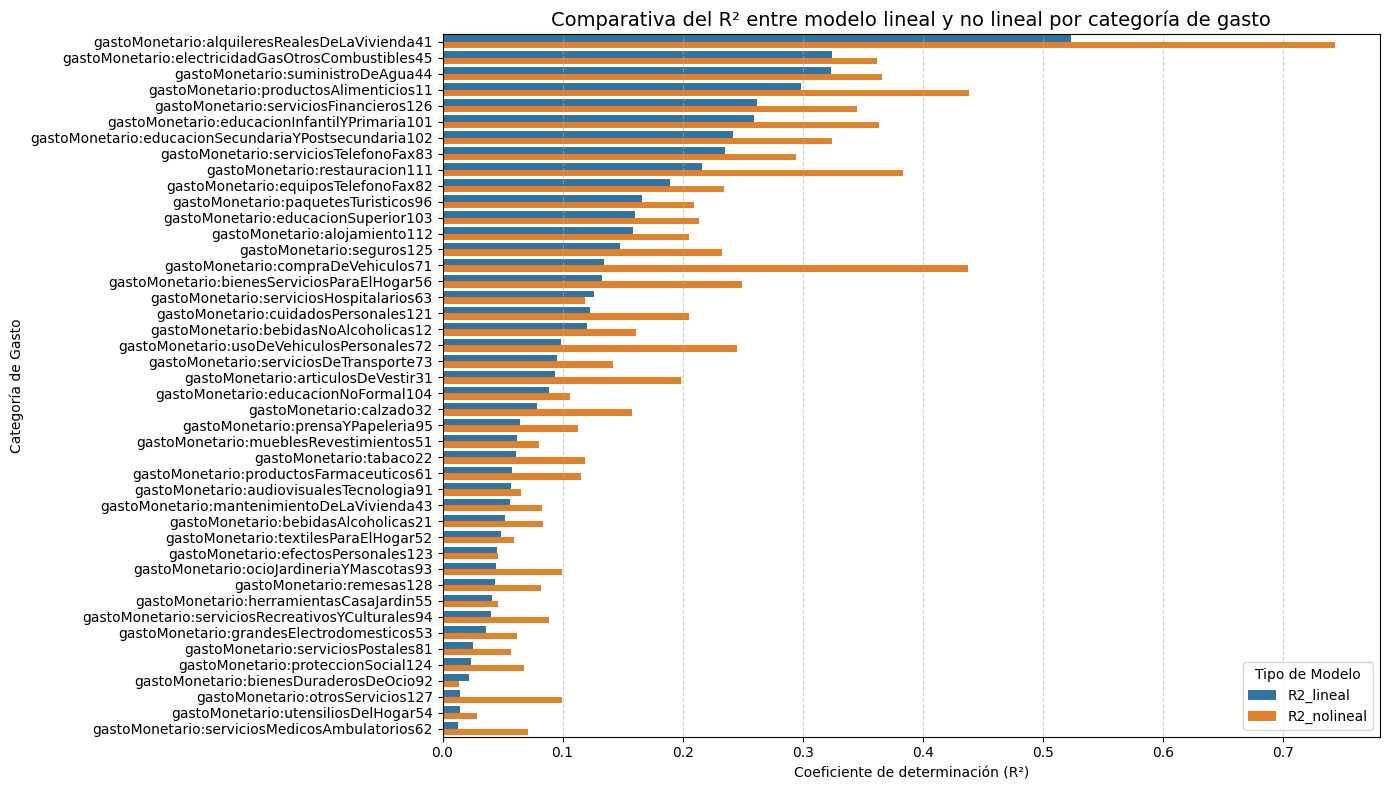

In [27]:
import seaborn as sns

def plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df, top_n=45):
    # Renombrar y unir
    df_lineal = metrics_lineal_df.rename(columns={"Gasto": "Target", "R2": "R2_lineal"})
    df_nolineal = metrics_nonlineal_df.rename(columns={"R2": "R2_nolineal"})

    merged = pd.merge(df_lineal[["Target", "R2_lineal"]], df_nolineal, on="Target")

    # Ordenar por R² lineal
    merged.sort_values(by="R2_lineal", ascending=False, inplace=True)
    top = merged.head(top_n)

    # Convertir a formato largo para seaborn
    melted = pd.melt(top, id_vars="Target", value_vars=["R2_lineal", "R2_nolineal"],
                     var_name="Modelo", value_name="R²")

    plt.figure(figsize=(14, 8))
    sns.barplot(data=melted, x="R²", y="Target", hue="Modelo")
    plt.title("Comparativa del R² entre modelo lineal y no lineal por categoría de gasto", fontsize=14)
    plt.xlabel("Coeficiente de determinación (R²)")
    plt.ylabel("Categoría de Gasto")
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.legend(title="Tipo de Modelo")
    plt.tight_layout()
    plt.show()

plot_r2_bars_comparison(metrics_lineal_df, metrics_nonlineal_df)

## Comparación del ajuste entre modelos lineales y no lineales

A continuación se resumen las principales conclusiones derivadas de la comparativa de R² entre los modelos lineales y no lineales para las diferentes categorías de gasto:

### 1. Mejor rendimiento del modelo no lineal en la mayoría de categorías
- En la gran mayoría de categorías analizadas, el modelo no lineal presenta valores de R² superiores al modelo lineal.
- Ejemplos destacados:
  - **ALQUILERES_REALES_DE_LA_VIVIENDA_41**: R² no lineal = 0.701 vs. lineal = 0.287
  - **SUMINISTRO_DE_AGUA_44**: R² no lineal = 0.403 vs. lineal = 0.290
  - **SERVICIOS_TELÉFONO_FAX_83**: R² no lineal = 0.261 vs. lineal = 0.223

Esto sugiere que el modelo no lineal es capaz de capturar relaciones complejas y no aditivas entre variables explicativas y el gasto.

### 2. Casos donde el modelo lineal rinde mejor
- Existen algunas pocas categorías donde el modelo lineal supera al no lineal:
  - **PRODUCTOS_FARMACÉUTICOS_61**: Lineal = 0.034 vs. No lineal = 0.033
  - **EFECTOS_PERSONALES_123**: Lineal = 0.016 vs. No lineal = 0.008
  - **SERVICIOS_FINANCIEROS_126**: Lineal = 0.011 vs. No lineal = 0.004

Estas diferencias son muy pequeñas, por lo que no invalidan la superioridad general del modelo no lineal.

### 3. Categorías con buen ajuste en ambos modelos
- Algunas partidas muestran un elevado ajuste tanto en su versión lineal como no lineal:
  - **ALQUILERES_IMPUTADOS_DE_LA_VIVIENDA_42**: Lineal = 0.65 | No lineal = 0.812
  - **PRODUCTOS_ALIMENTICIOS_11**: Lineal = 0.244 | No lineal = 0.269
  - **SEGUROS_125**: Lineal = 0.230 | No lineal = 0.274

Esto indica que para ciertas categorías, incluso un modelo simple puede capturar una gran parte de la varianza del gasto.

### 4. Categorías con bajo poder explicativo
- Existen partidas con muy bajo R² en ambos modelos, lo que sugiere una alta variabilidad no explicada por las variables disponibles:
  - **SERVICIOS_HOSPITALARIOS_63**: Lineal = 0.059 | No lineal = 0.004
  - **HERRAMIENTAS_CASA_JARDÍN_55**: Lineal = 0.017 | No lineal = 0.020
  - **BIENES_DURADEROS_DE_OCIO_92**: Lineal = 0.017 | No lineal = 0.012

Esto puede deberse a que el gasto en estas categorías responde a factores impredecibles o externos al modelo, como decisiones discrecionales o eventos puntuales.

### 5. Conclusión general
El análisis muestra una clara mejora del poder predictivo cuando se emplean modelos no lineales, especialmente en categorías de gasto complejas o con interacciones entre variables explicativas. No obstante, para ciertas partidas el modelo lineal sigue siendo competitivo, lo que refuerza la importancia de adaptar la técnica al contexto de cada variable dependiente.
